In [1]:
%load_ext autoreload
%autoreload 2
from brian2 import *
from scipy.signal import welch
from multiprocessing import Pool

import itertools
import experiment_9_single_module as ex_9
import power_spectral_density as psd

In [2]:
def plot_ma(n, x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 50, 10
    start = 1000
    end = max(start, max(x))
    ma, t = psd.moving_average(x, dt, shift, start, end)
    ma = 100.0 * ma / n
    if not ax:
        _, ax = plt.subplots()
        
    #ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Firing rate\n (% neurons/ms)')
    ax.plot(t, ma, color=color, label=label)
    
def plot_spectrum(x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 75, 10
    if not ax:
        _, ax = plt.subplots()
        
    start, end = 1000, max(x)
    f, pxx = psd.power_spectrum(x, dt, shift, start, end)
    ax.semilogy(f, pxx, color=color, label=label)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power')
    

In [39]:
def exp9a(a):
    return ex_9.run_simulation(exex_weight=a)

p = Pool(8)
args_a = np.arange(0, 20, 2)
results_a = p.map(exp9a, args_a)


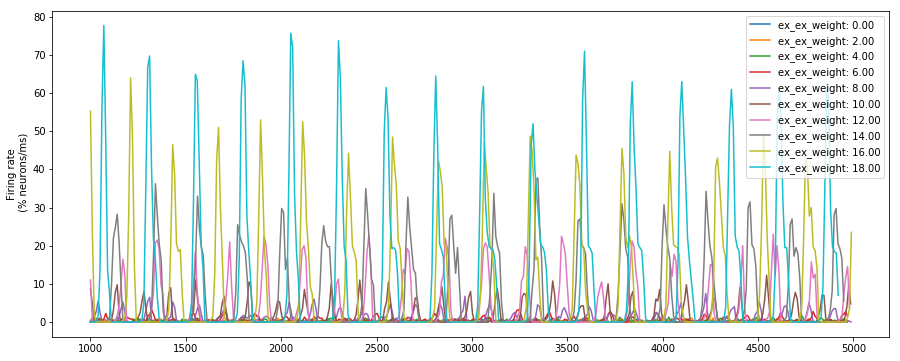

In [43]:
f, ax = plt.subplots(1, 1, figsize=(15,6))
dt, shift = 10, 10
for i, data in enumerate(results_a):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=ax, color="C{}".format(i),
            label="ex_ex_weight: {:.2f}".format(args_a[i]))
ax.legend()
plt.show()

In [270]:
a, b, c, d = 5, 4, 4, 4 
a, b, c, d = 5, 10, 10, 10
a, b, c, d = 5, 10, 10, 10
data = ex_9.run_simulation(
    exin_w=(10,2),
    inex_w=(10,2),
    inin_w=(10,2),
    exin_d=(2,1),
    inex_d=(5,2),
    inin_d=(5,2),
    
)

Setting up synapses:
	EX_IN_SYN... (288 synapses) [0.02s]
	IN_EX_SYN... (400 synapses) [0.02s]
	IN_IN_SYN... (100 synapses) [0.02s]
 [0.08s]
Running sym...  [6.66s]


5,091 exc spikes, 5,581 inh spikes


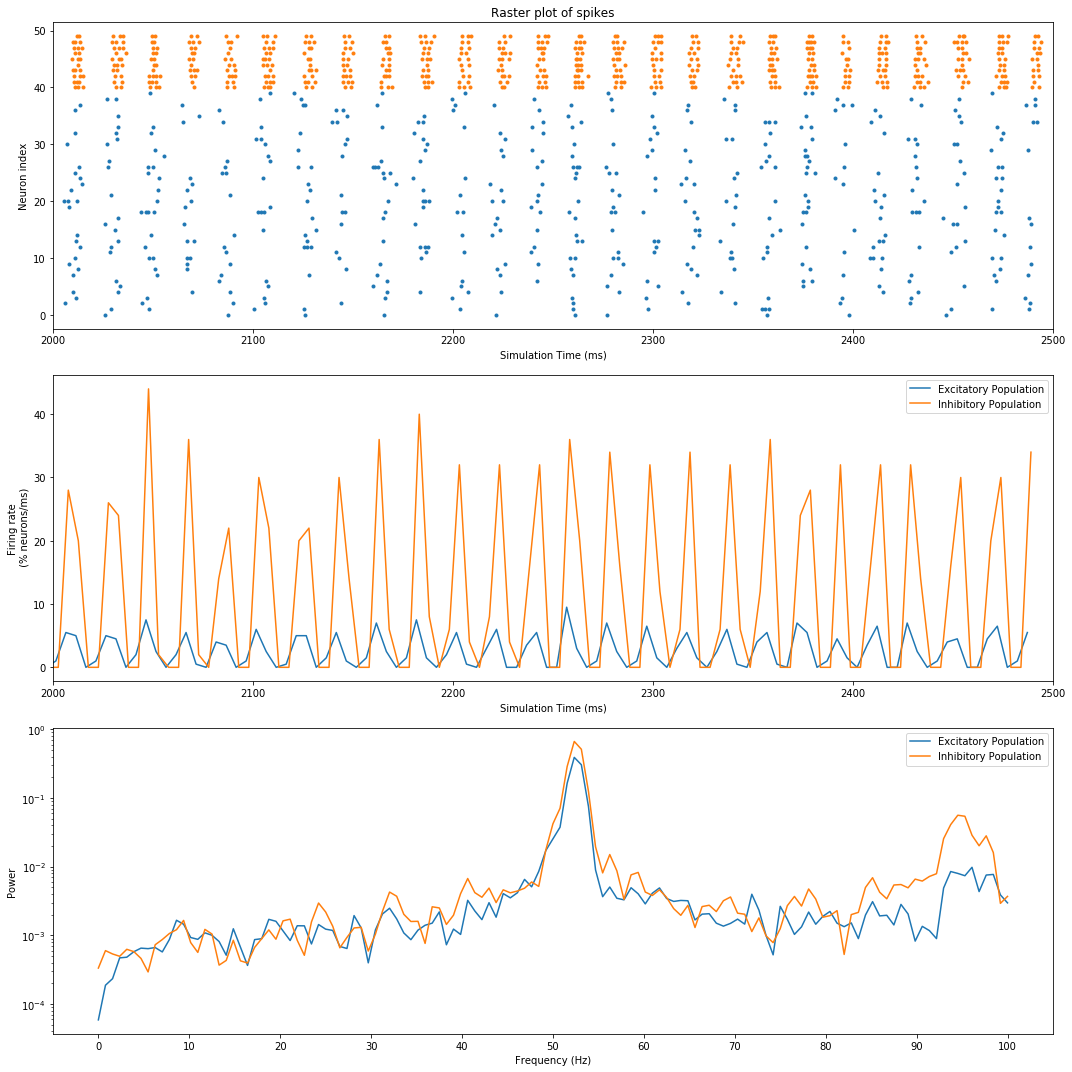

In [276]:
plot_stuff(data, start=2000, end=2500, save='figures/ping_50hz.png')

In [275]:
def plot_stuff(data, start=1000, end=2000, save=None):
    N, N_EX, N_IN = 50, 40, 10
    #N, N_EX, N_IN = 100, 80, 20
    N, N_EX, N_IN, X, Y, X2, Y2 = [
        data[k]
        for k
        in ['N', 'N_EX', 'N_IN', 'X', 'Y', 'X2', 'Y2']
    ]
    
    start_time = start
    end_time = end
    
    mask1 = np.logical_and(X >= start_time, X < end_time)
    mask2 = np.logical_and(X2 >= start_time, X2 < end_time)
    
    print("{:,} exc spikes, {:,} inh spikes".format(len(X), len(X2)))
    
    mask = np.logical_and.reduce((X >= start_time, X < end_time))
    mask2 = np.logical_and.reduce((X2 >= start_time, X2 < end_time))
    
    fig, axarr = plt.subplots(3, figsize=(15,15))
    axarr[0].plot(X[mask], Y[mask], '.', color='C0', label='Excitatory Population')
    axarr[0].plot(X2[mask2], Y2[mask2]+N_EX, '.', color='C1', label='Inhibitory Population')
    axarr[0].set_ylabel('Neuron index')
    axarr[0].set_xlabel('Simulation Time (ms)')
    axarr[0].set_title('Raster plot of spikes')
    axarr[0].set_xlim([start_time, end_time])
    #axarr[0].legend(loc=3)
    
    dt, shift = 5, 5
    plot_ma(N_EX, X[mask], dt, shift, ax=axarr[1] , label='Excitatory Population')
    plot_ma(N_IN, X2[mask2], dt, shift, ax=axarr[1], label='Inhibitory Population')
    axarr[1].set_xlabel('Simulation Time (ms)')
    axarr[1].set_xlim([start_time, end_time])
    axarr[1].legend()
    
    #fig, axarr = plt.subplots(2, sharex=True, figsize=(15,6))
    plot_spectrum(X, dt, shift, ax=axarr[2], label='Excitatory Population')
    plot_spectrum(X2, dt, shift, ax=axarr[2], label='Inhibitory Population')
    axarr[2].set_xticks(np.arange(0, (1000.0/shift)/2.0 + 1, 10))
    axarr[2].legend()
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()




In [16]:

def func(arg):#, d1, d2, d3, d4):
    a, b, c, d, exconn, inconn, delay1, delay2, delay3 = arg
    return ex_9.run_simulation(
        exex_weight=a,
        exin_weight=b,
        inex_weight=c,
        inin_weight=d,
        ex_conn=exconn,
        in_conn=inconn,
        delay_exex=delay1,
        delay_exin=delay2,
        delay_inex=delay2,
        delay_inin=delay3
    )

a = np.linspace(0, 10, 1)
b = np.linspace(0, 10, 1)
c = np.linspace(0, 10, 1)
d = np.linspace(0, 10, 1)
exconn = np.linspace(0.4, 0.5, 1)
inconn = np.linspace(0.4, 0.5, 1)
delays = [1, 5, 10]
args = itertools.product(a, b, c, d, exconn, inconn, delays, delays, delays)
pool = Pool(8)
results = pool.map(func, args)

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 1, 1)
378 exc spikes, 78 inh spikes


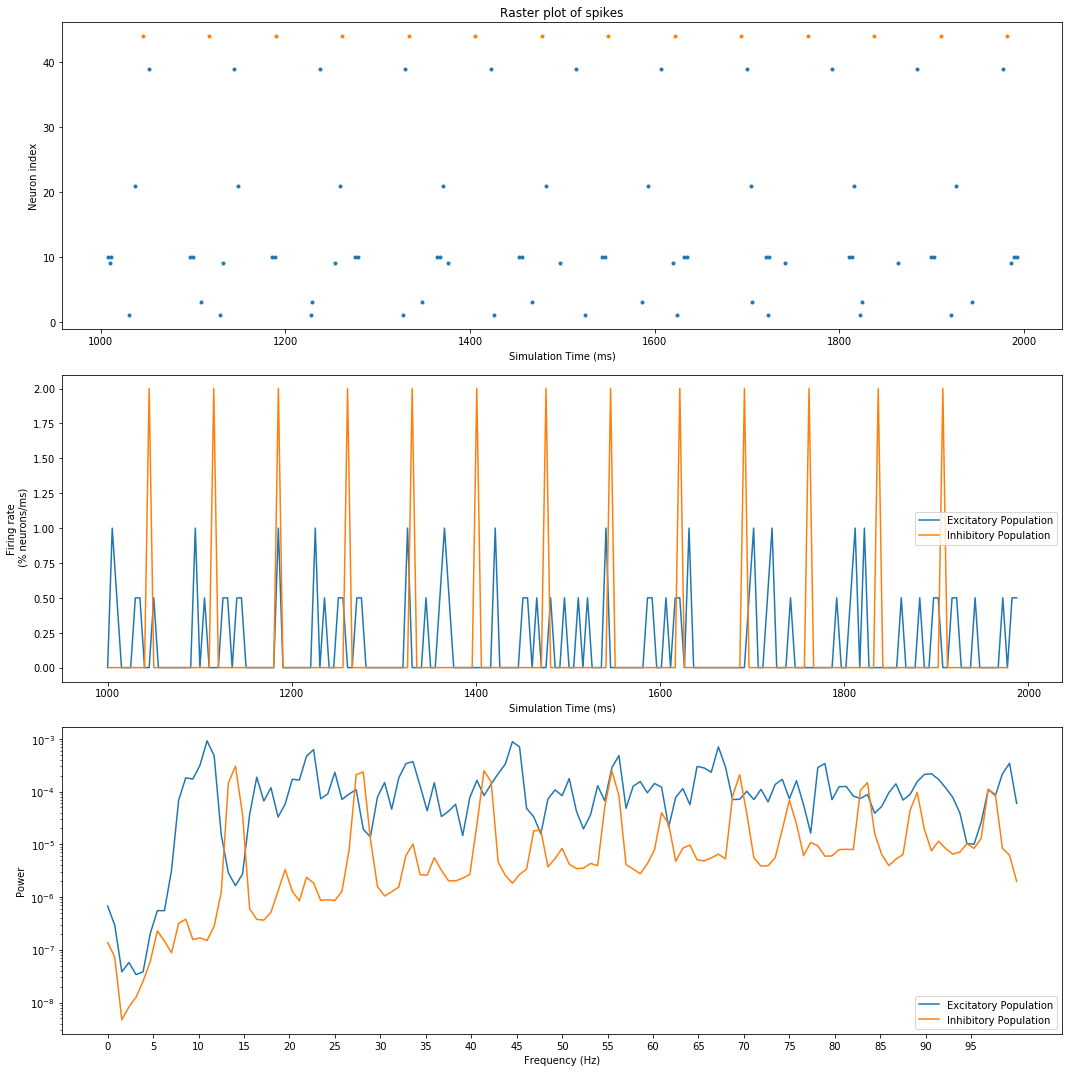

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 1, 5)
378 exc spikes, 78 inh spikes


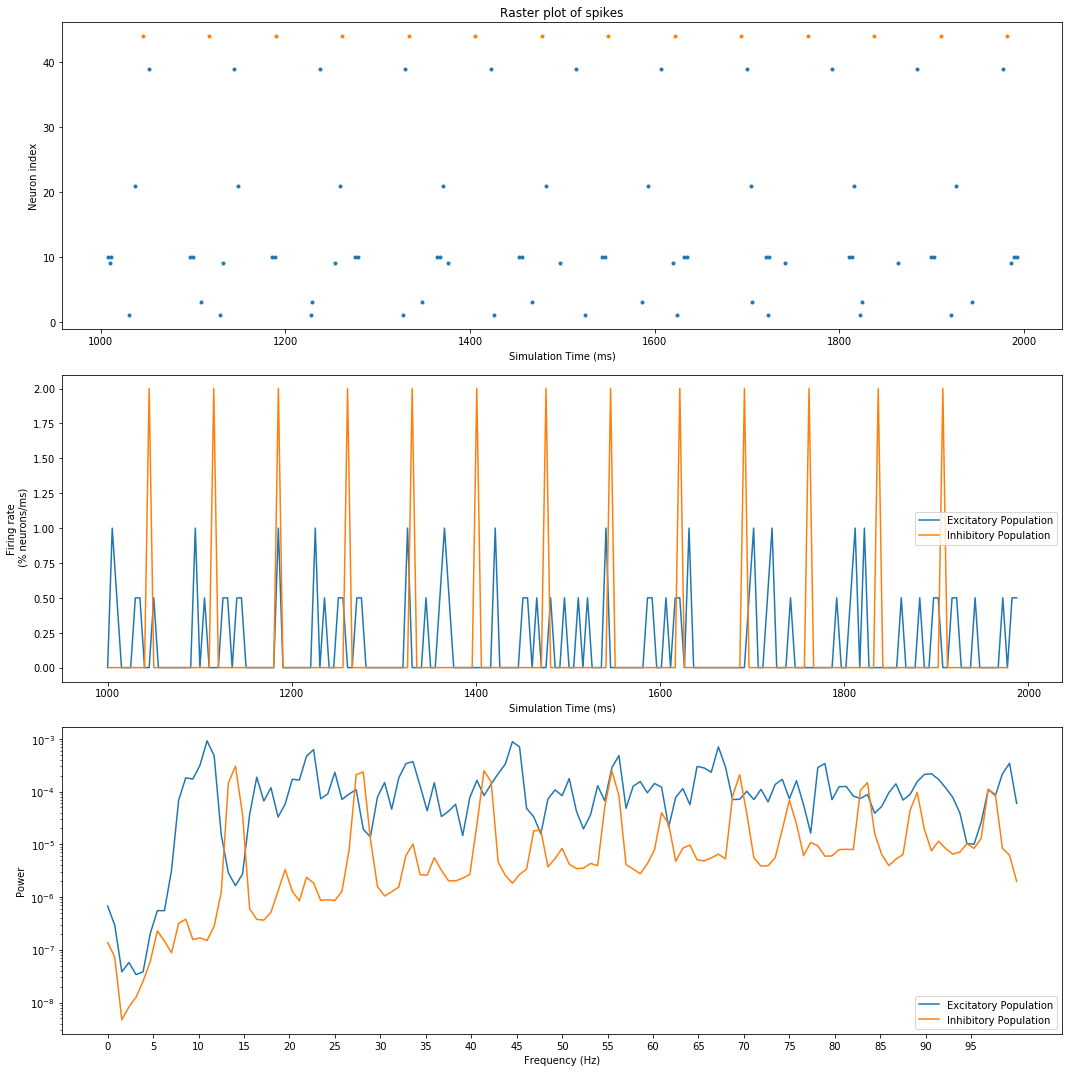

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 1, 10)
378 exc spikes, 78 inh spikes


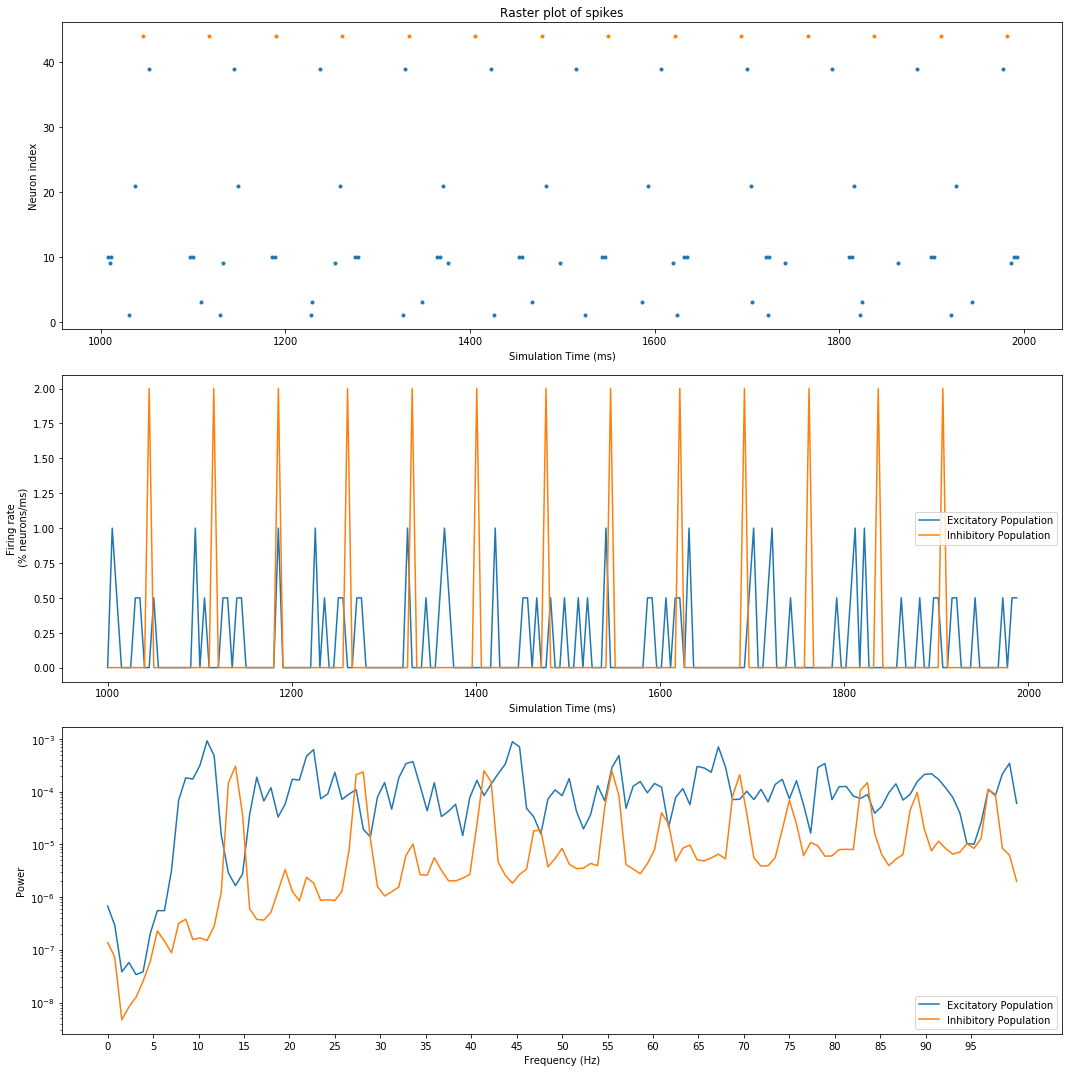

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 5, 1)
378 exc spikes, 78 inh spikes


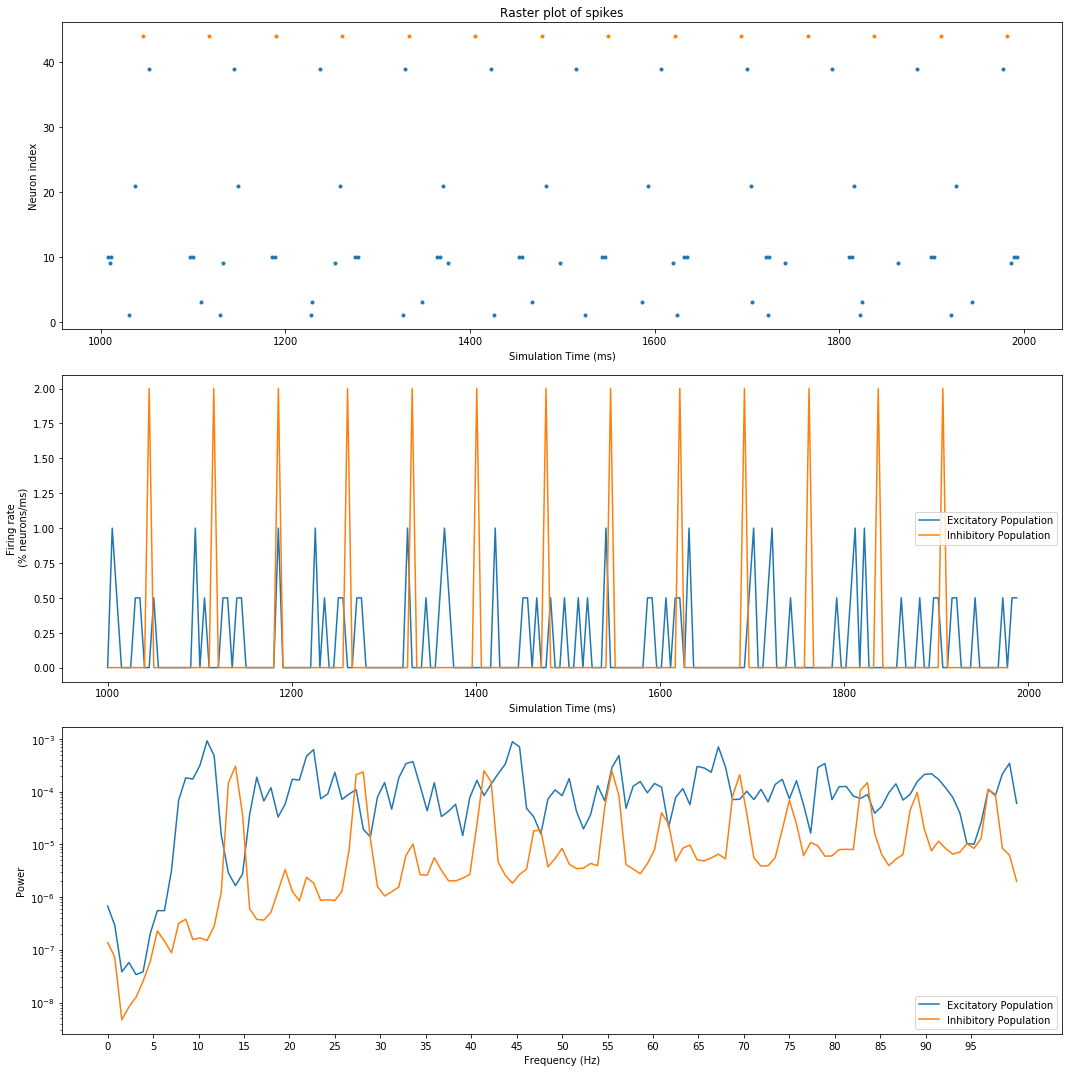

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 5, 5)
378 exc spikes, 78 inh spikes


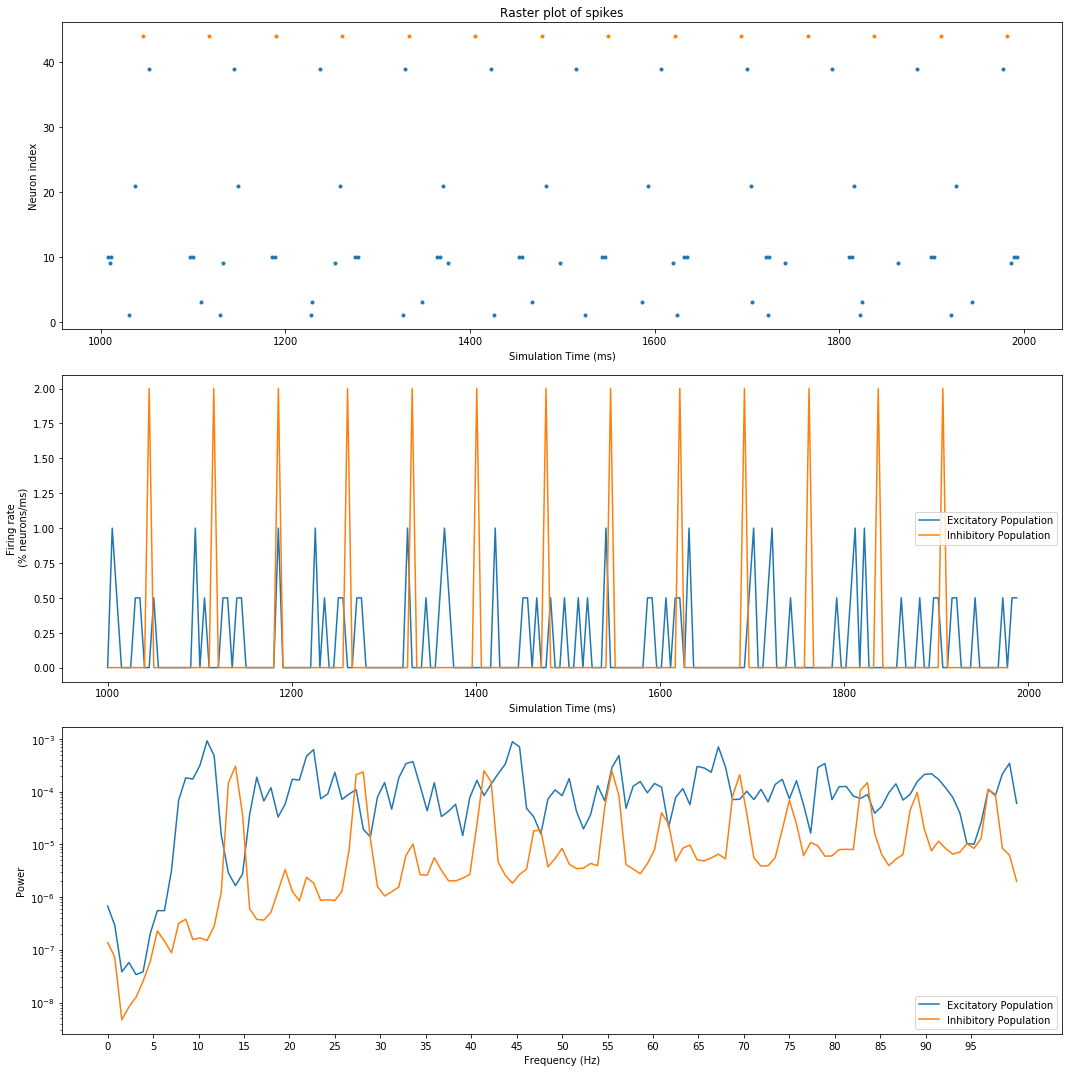

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 5, 10)
378 exc spikes, 78 inh spikes


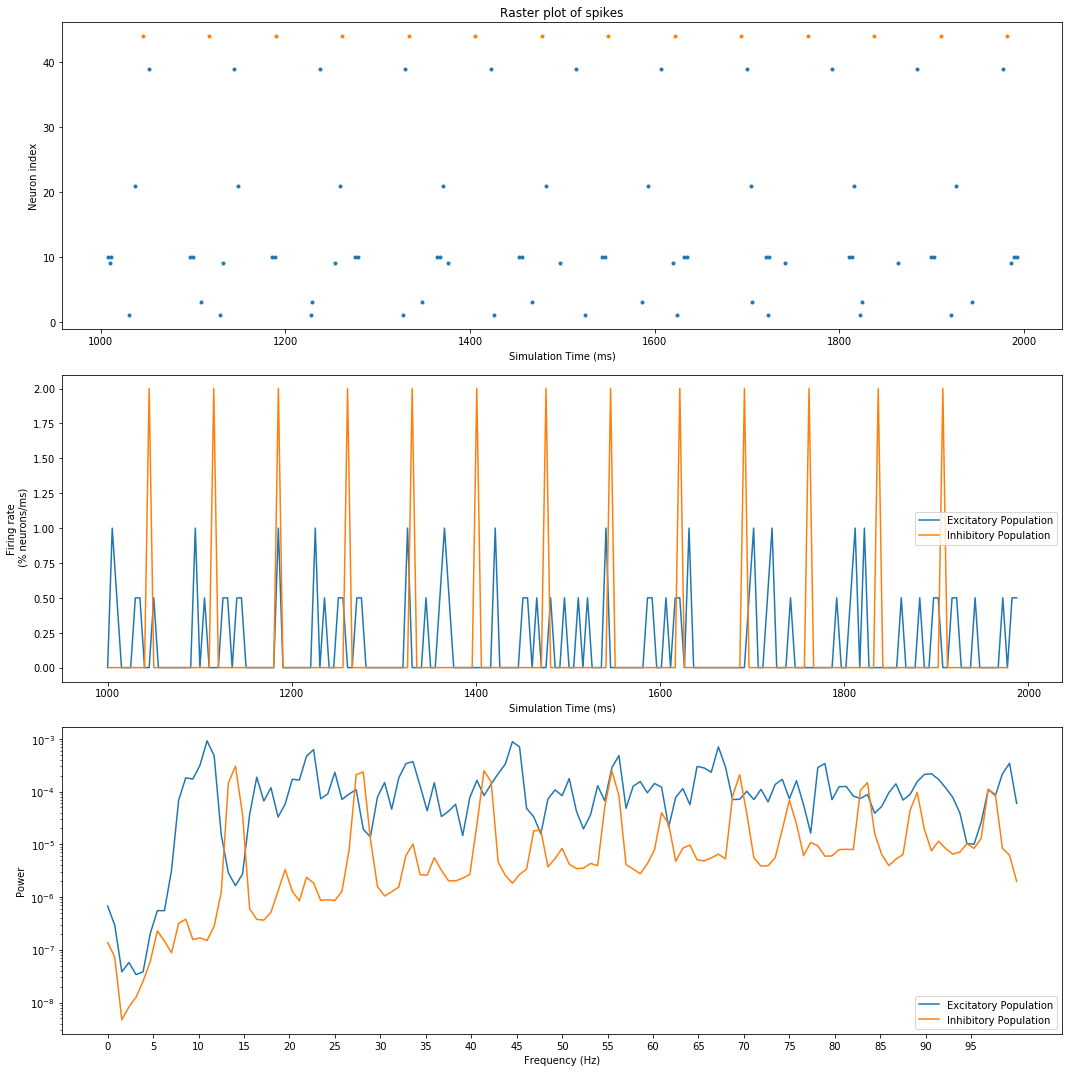

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 10, 1)
378 exc spikes, 78 inh spikes


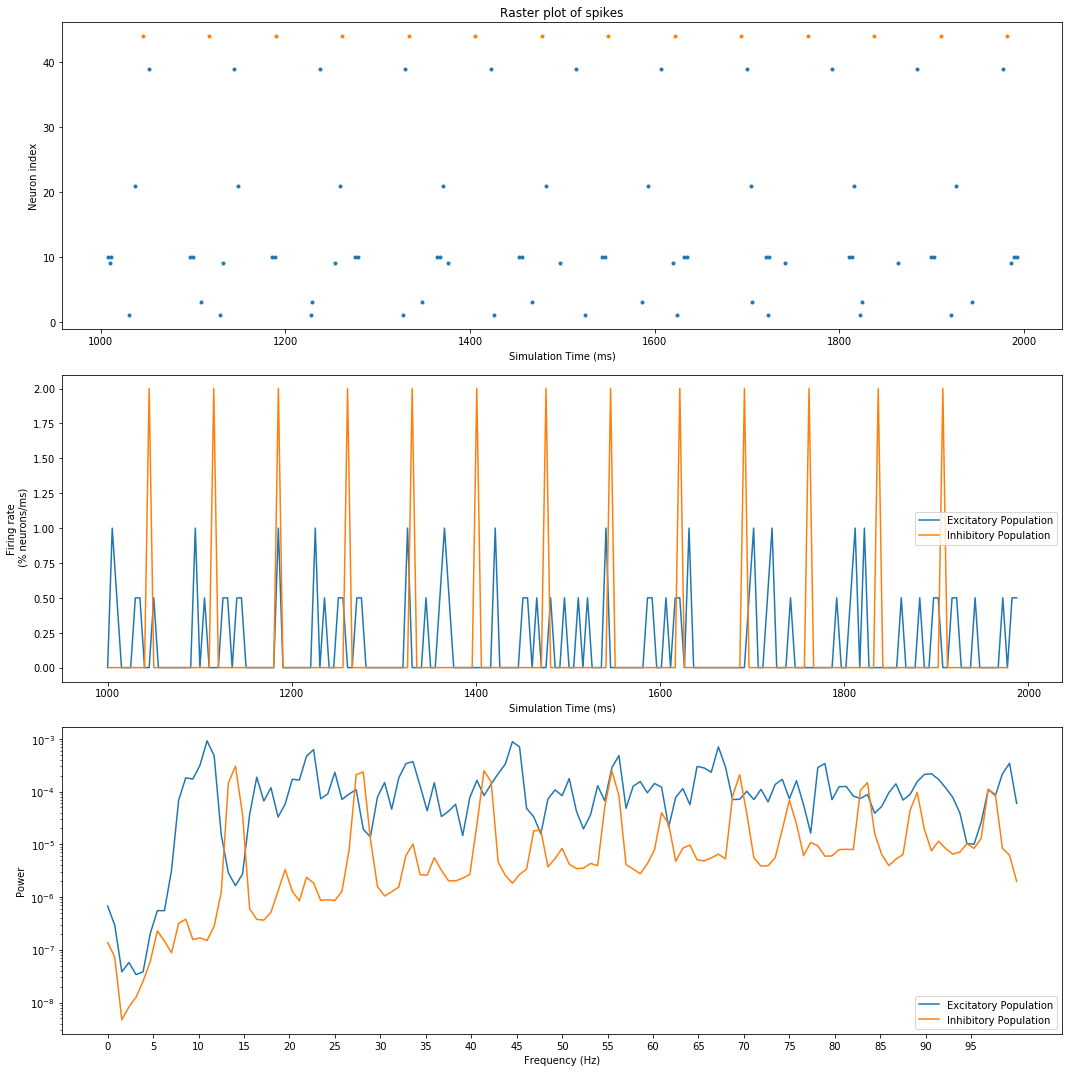

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 10, 5)
378 exc spikes, 78 inh spikes


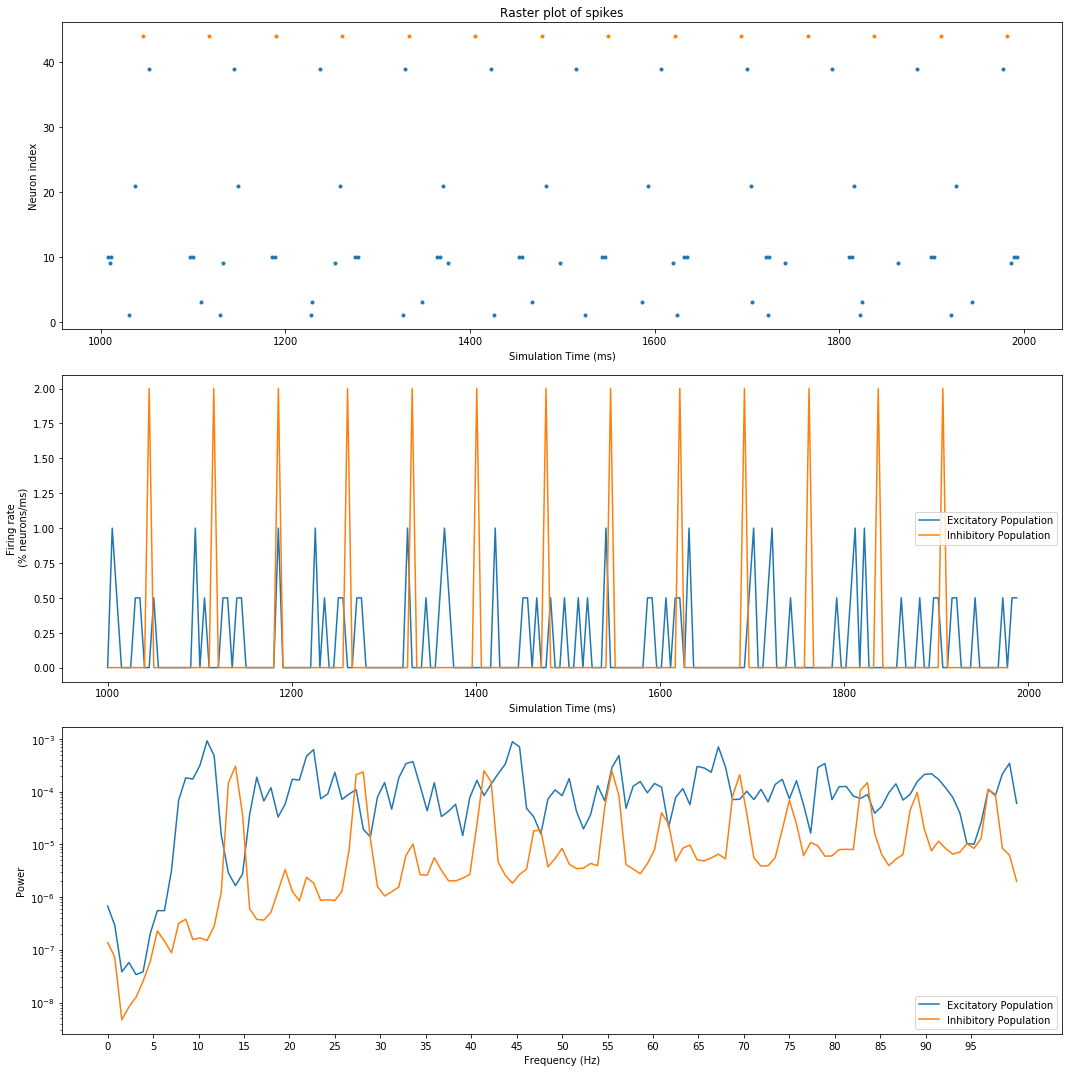

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 10, 10)
378 exc spikes, 78 inh spikes


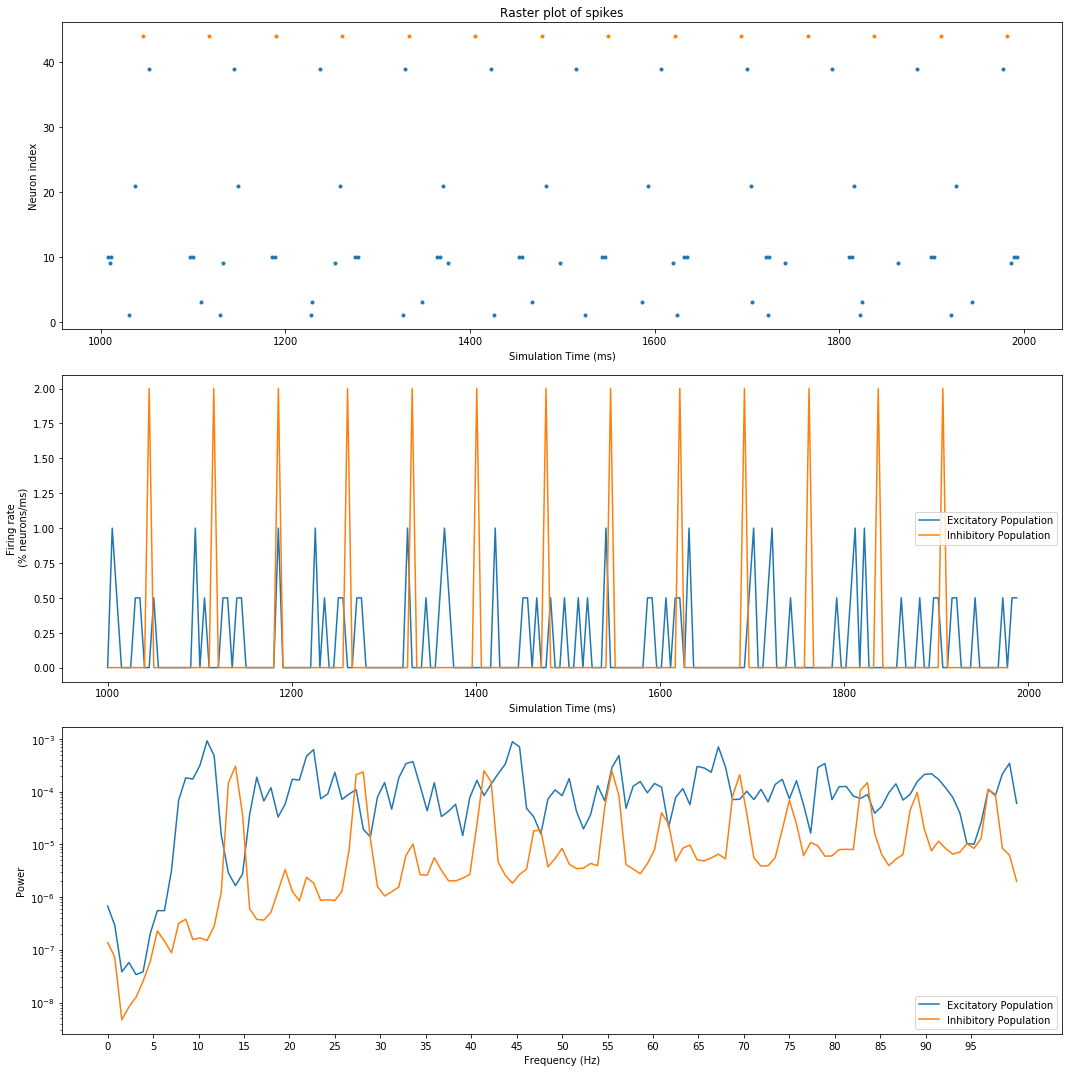

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 1, 1)
378 exc spikes, 78 inh spikes


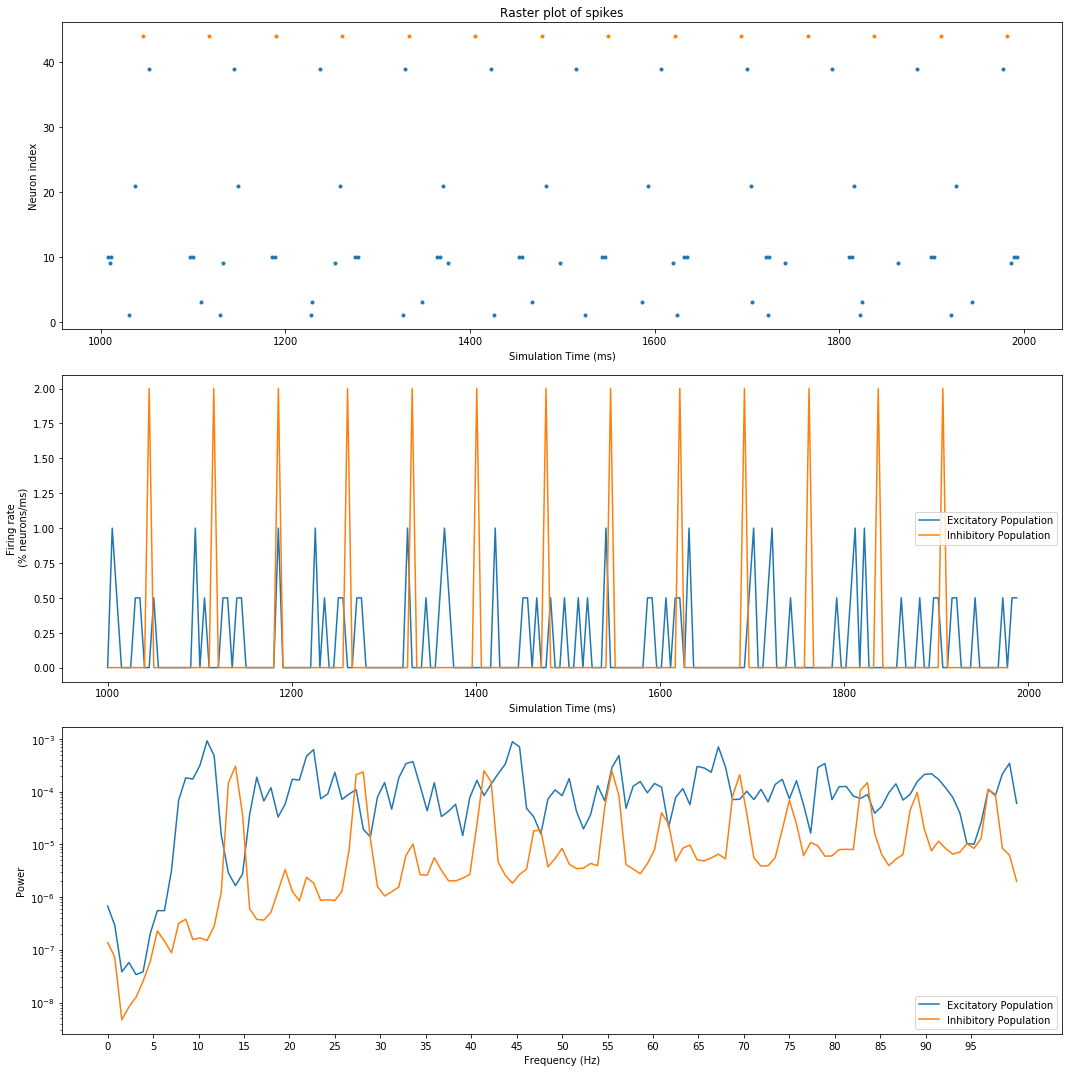

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 1, 5)
378 exc spikes, 78 inh spikes


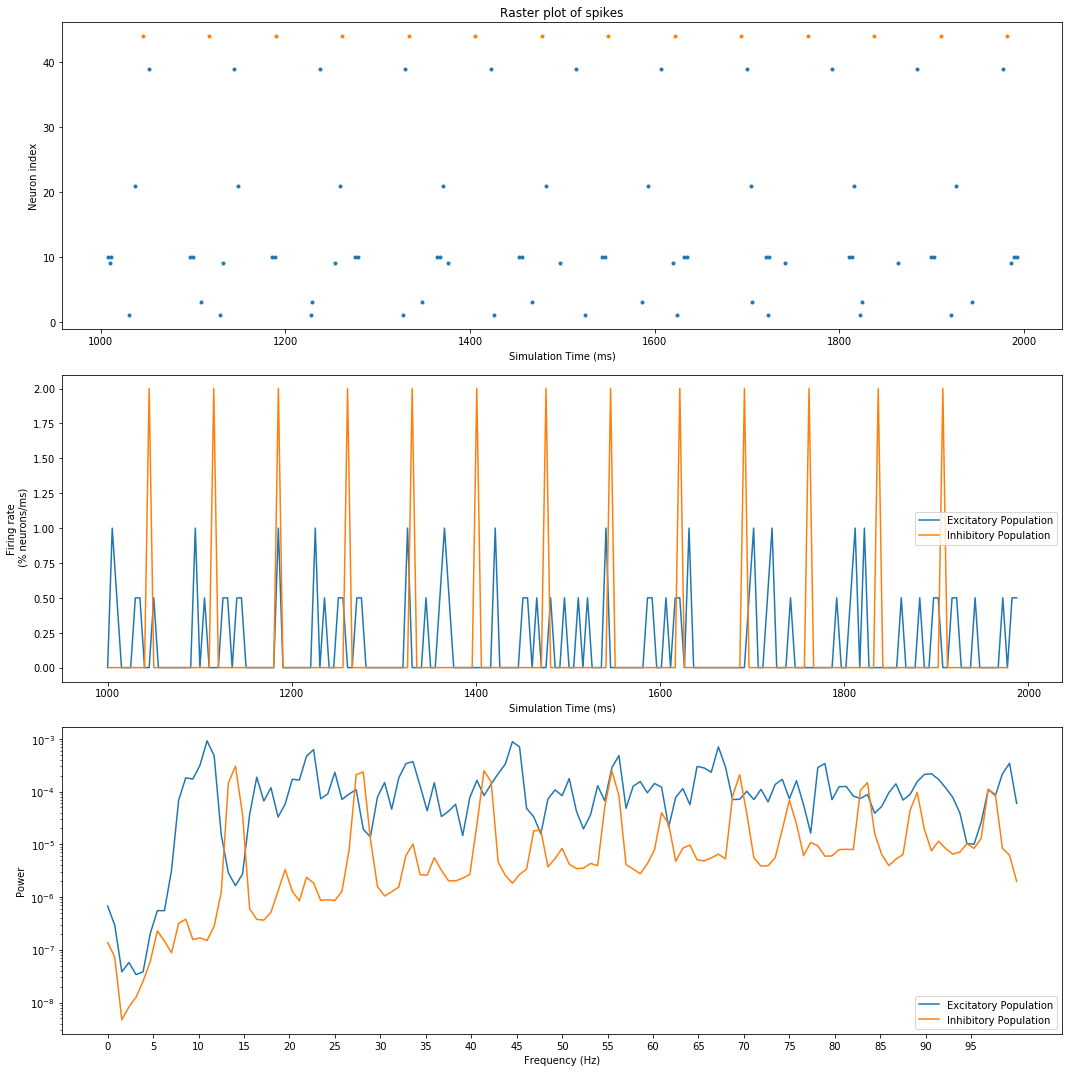

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 1, 10)
378 exc spikes, 78 inh spikes


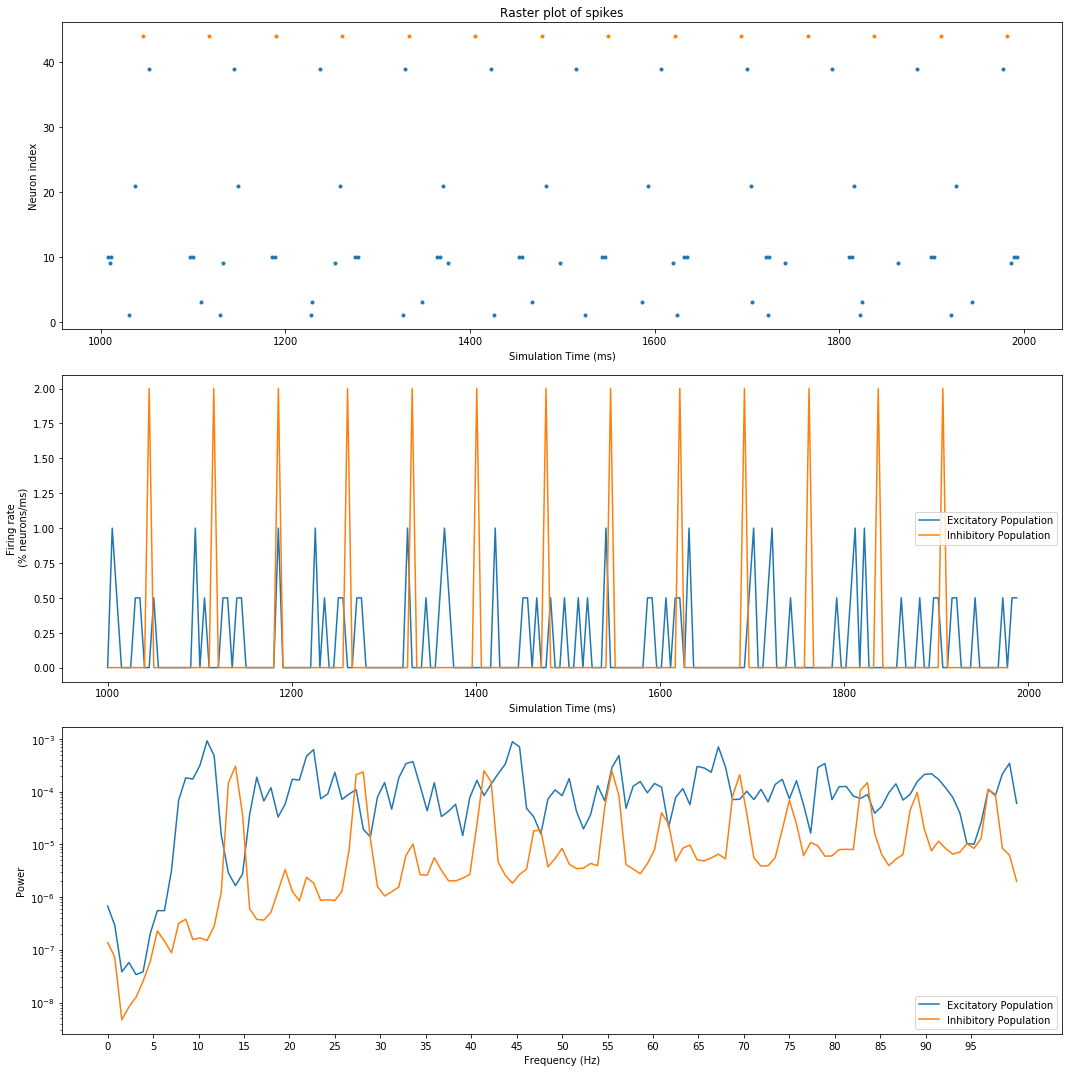

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 5, 1)
378 exc spikes, 78 inh spikes


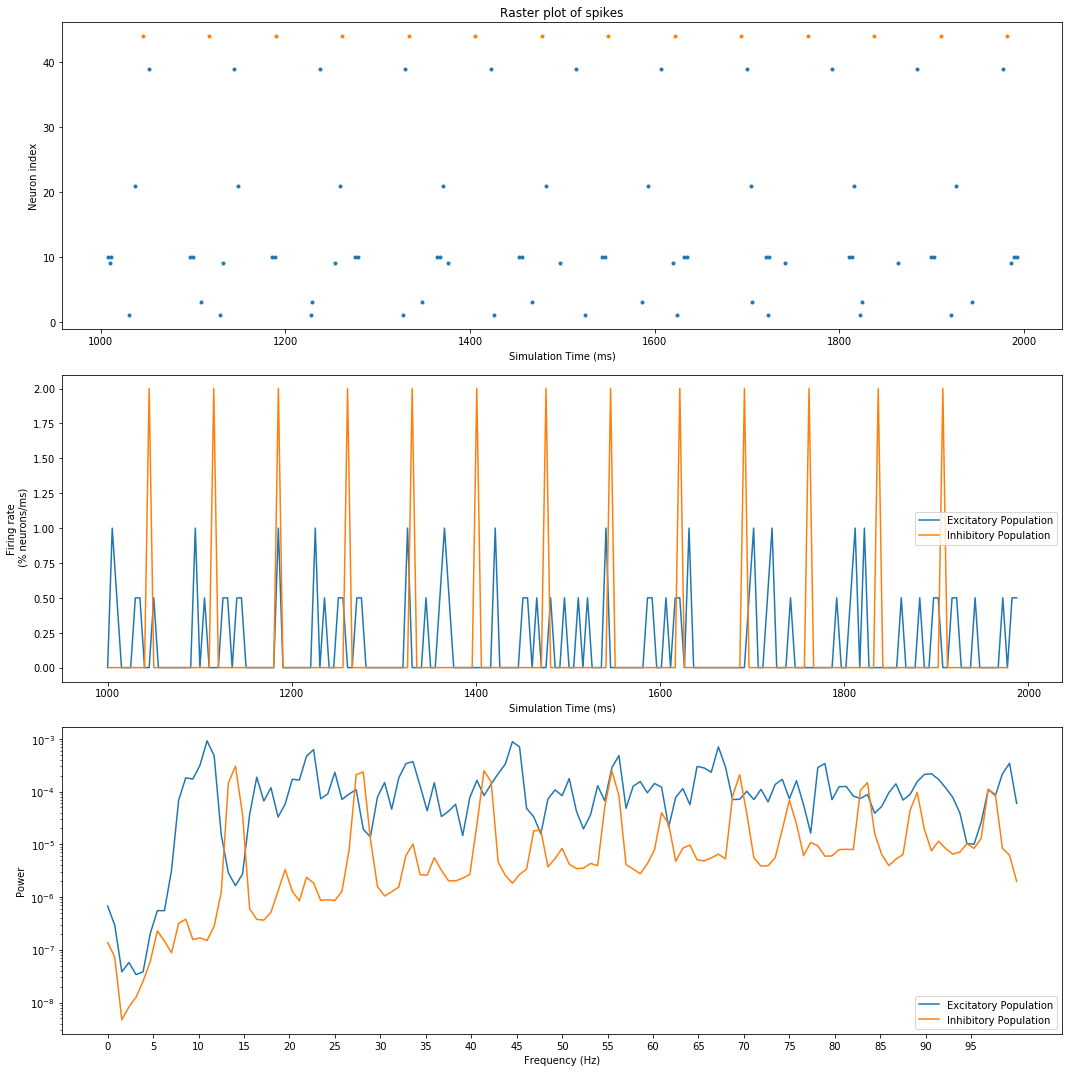

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 5, 5)
378 exc spikes, 78 inh spikes


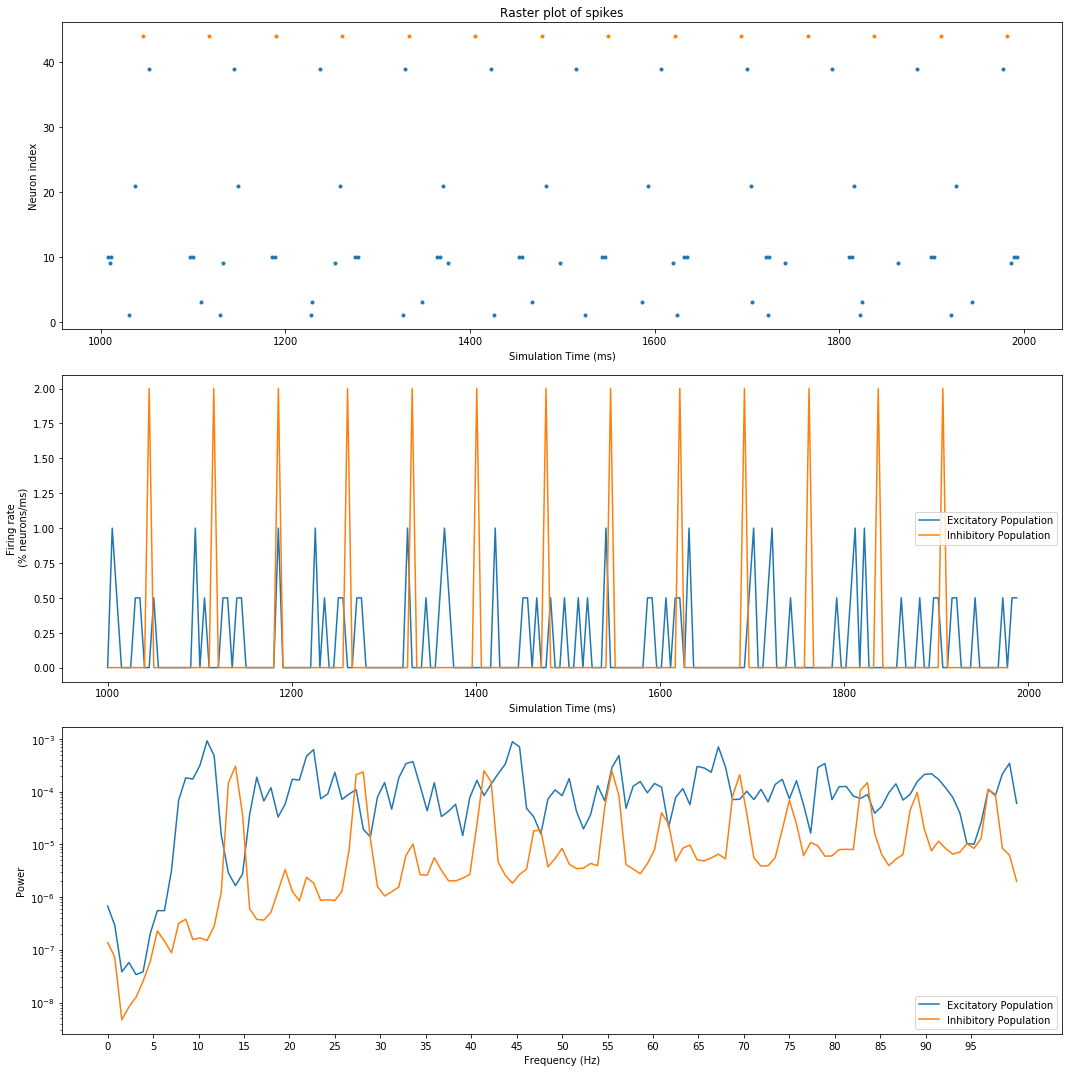

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 5, 10)
378 exc spikes, 78 inh spikes


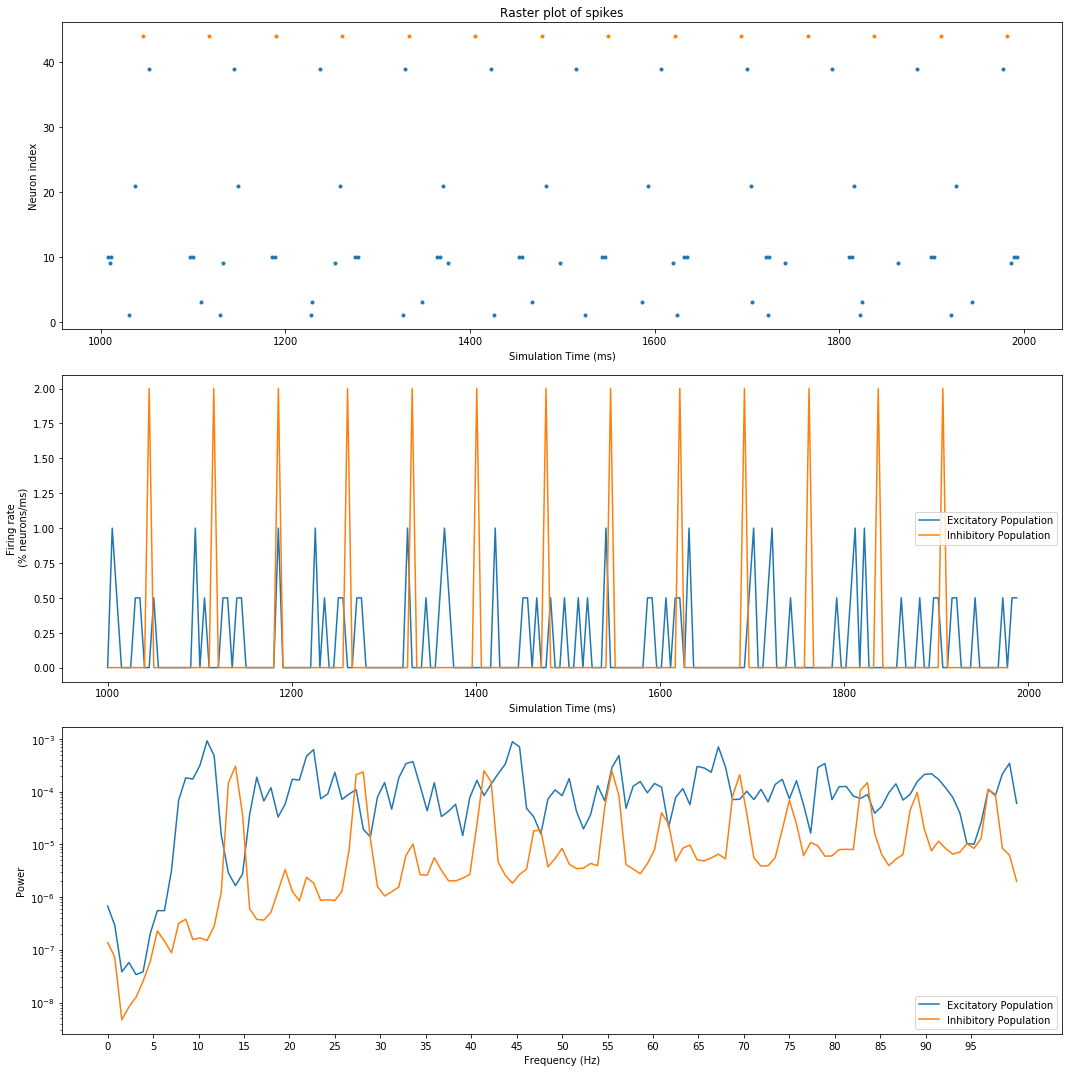

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 10, 1)
378 exc spikes, 78 inh spikes


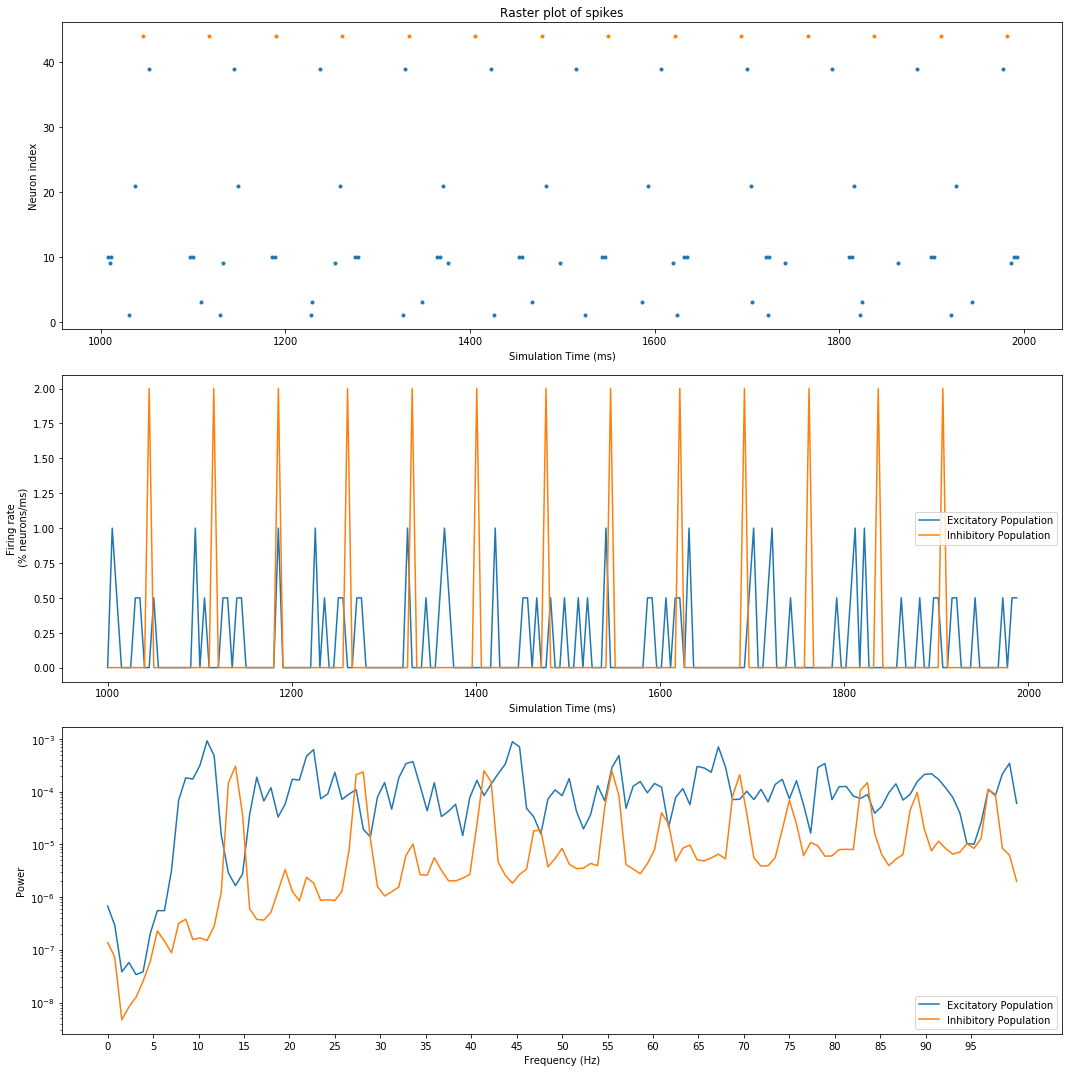

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 10, 5)
378 exc spikes, 78 inh spikes


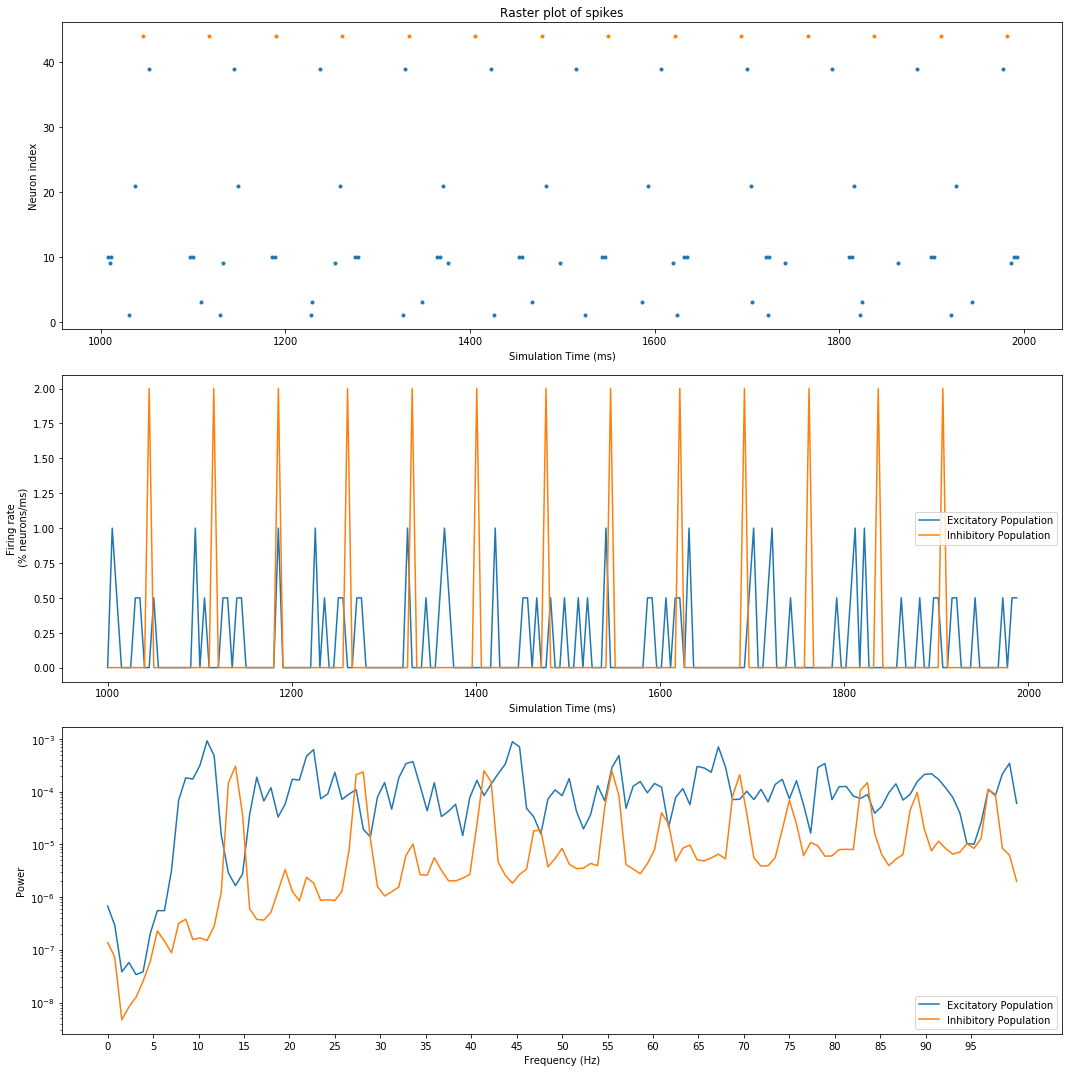

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 10, 10)
378 exc spikes, 78 inh spikes


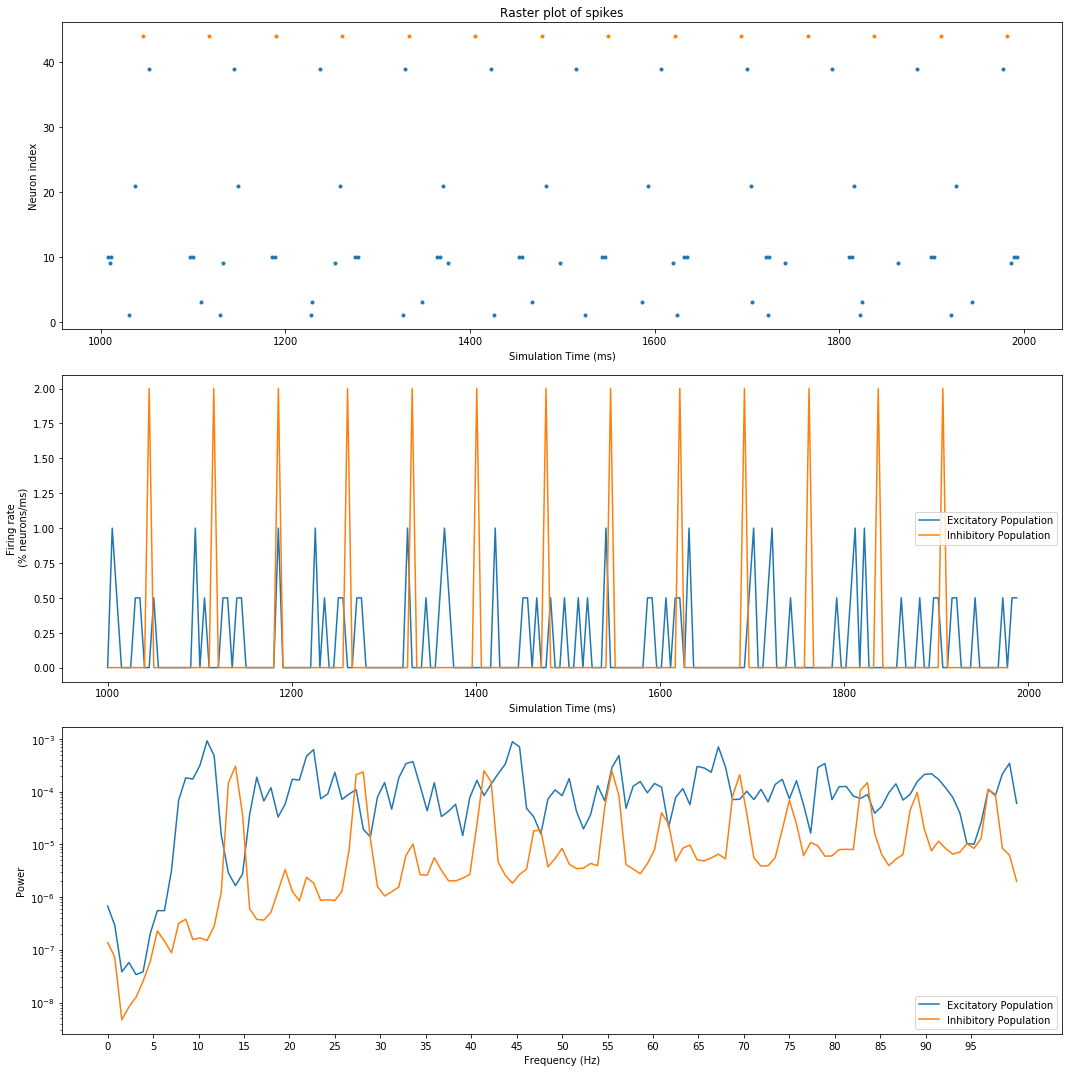

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 1, 1)
378 exc spikes, 78 inh spikes


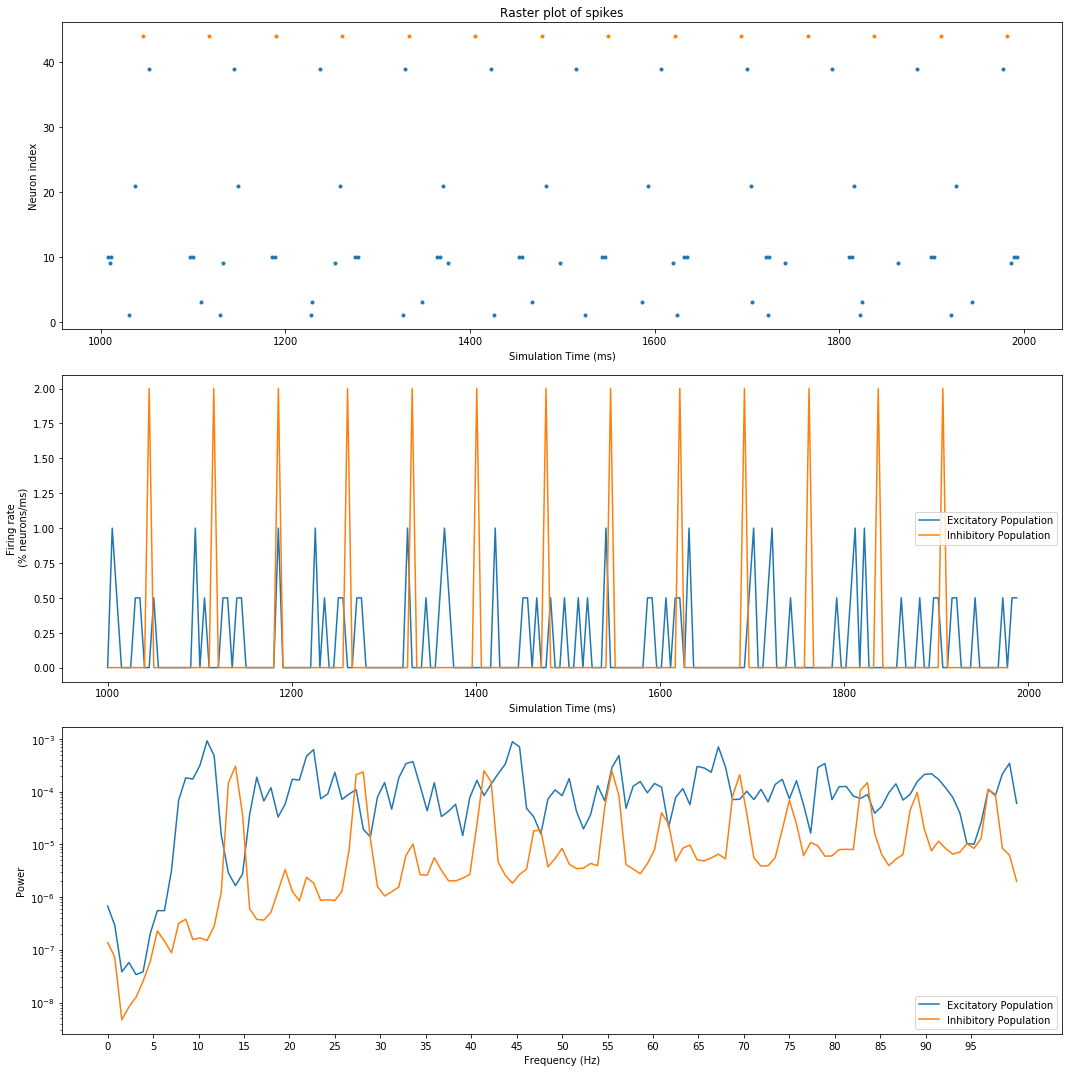

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 1, 5)
378 exc spikes, 78 inh spikes


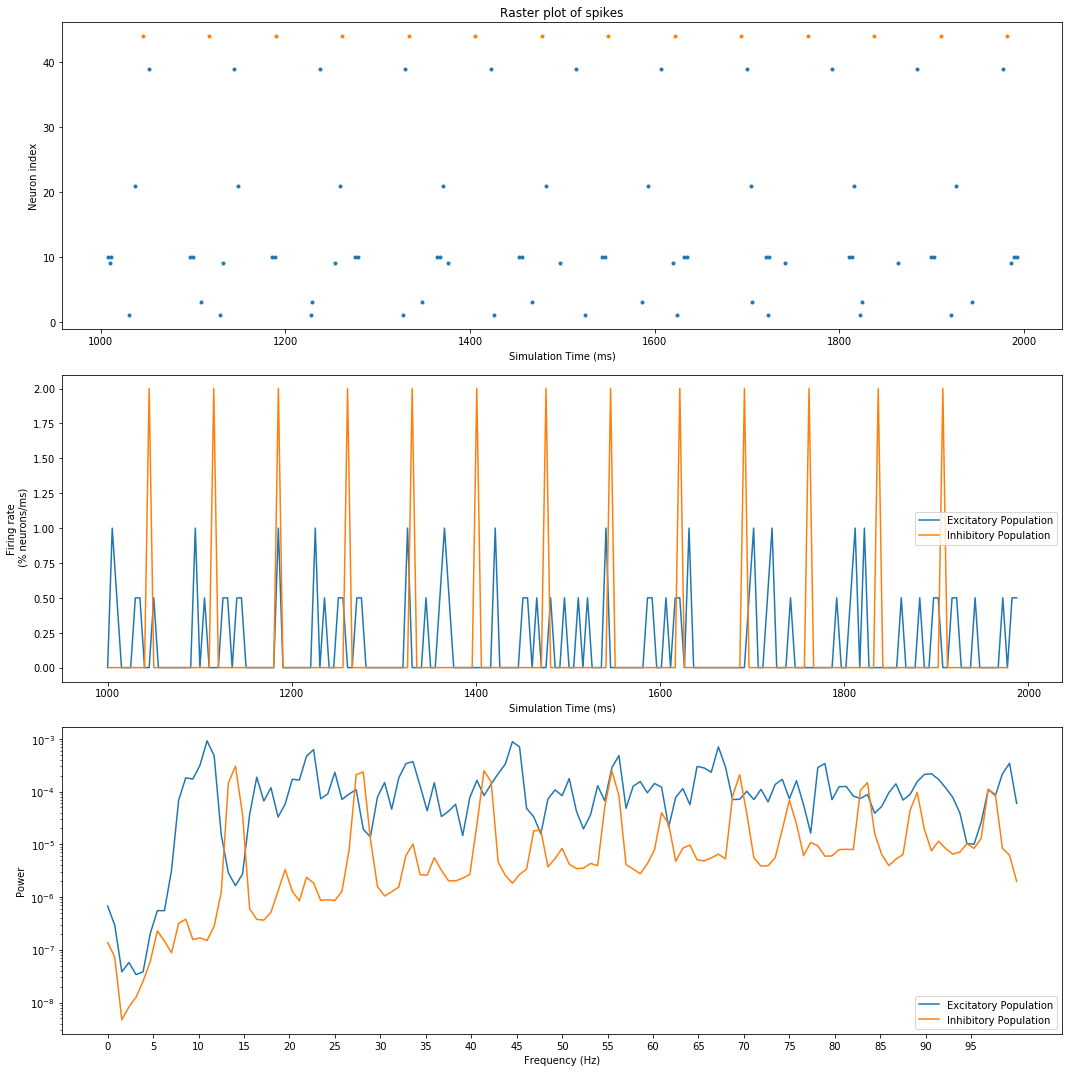

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 1, 10)
378 exc spikes, 78 inh spikes


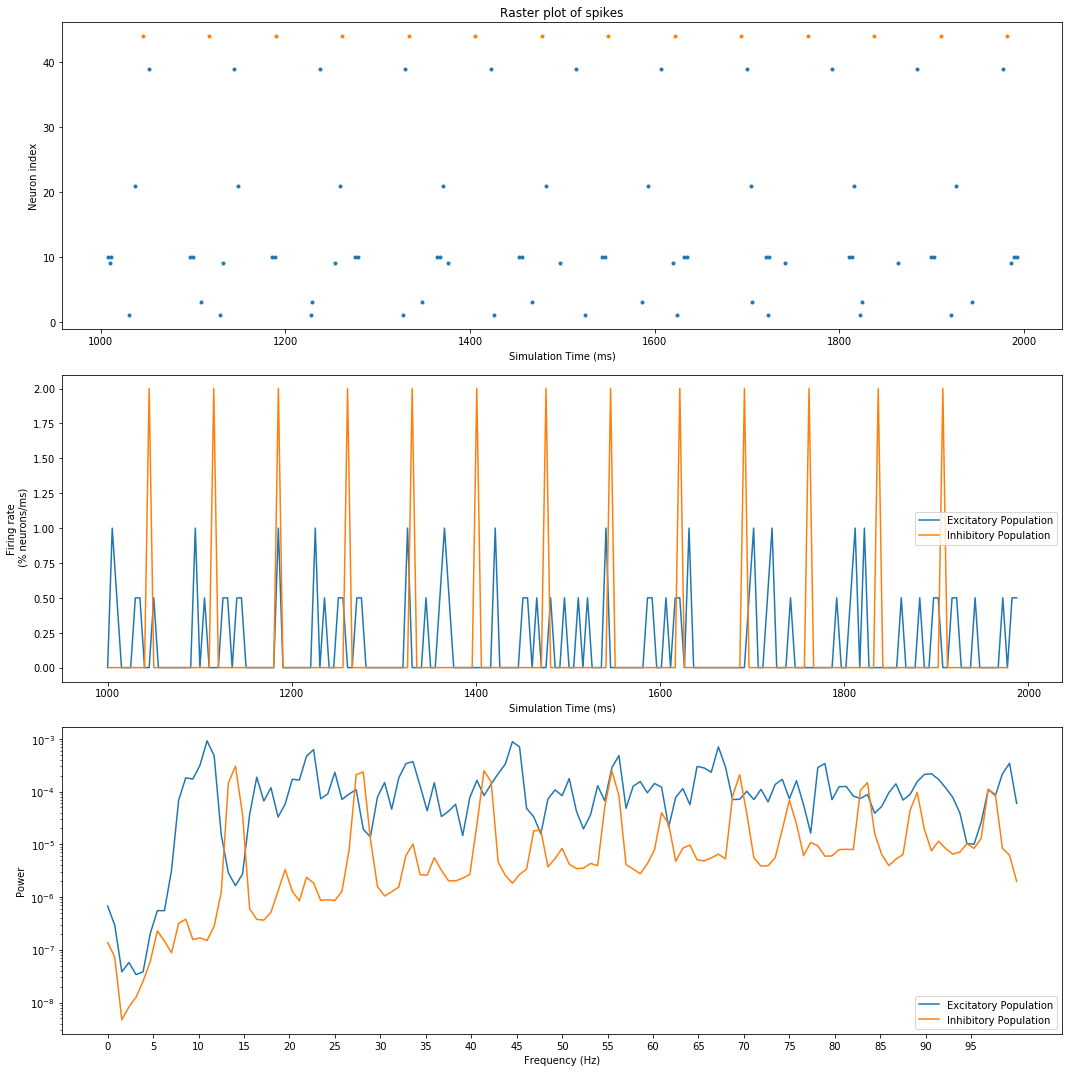

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 5, 1)
378 exc spikes, 78 inh spikes


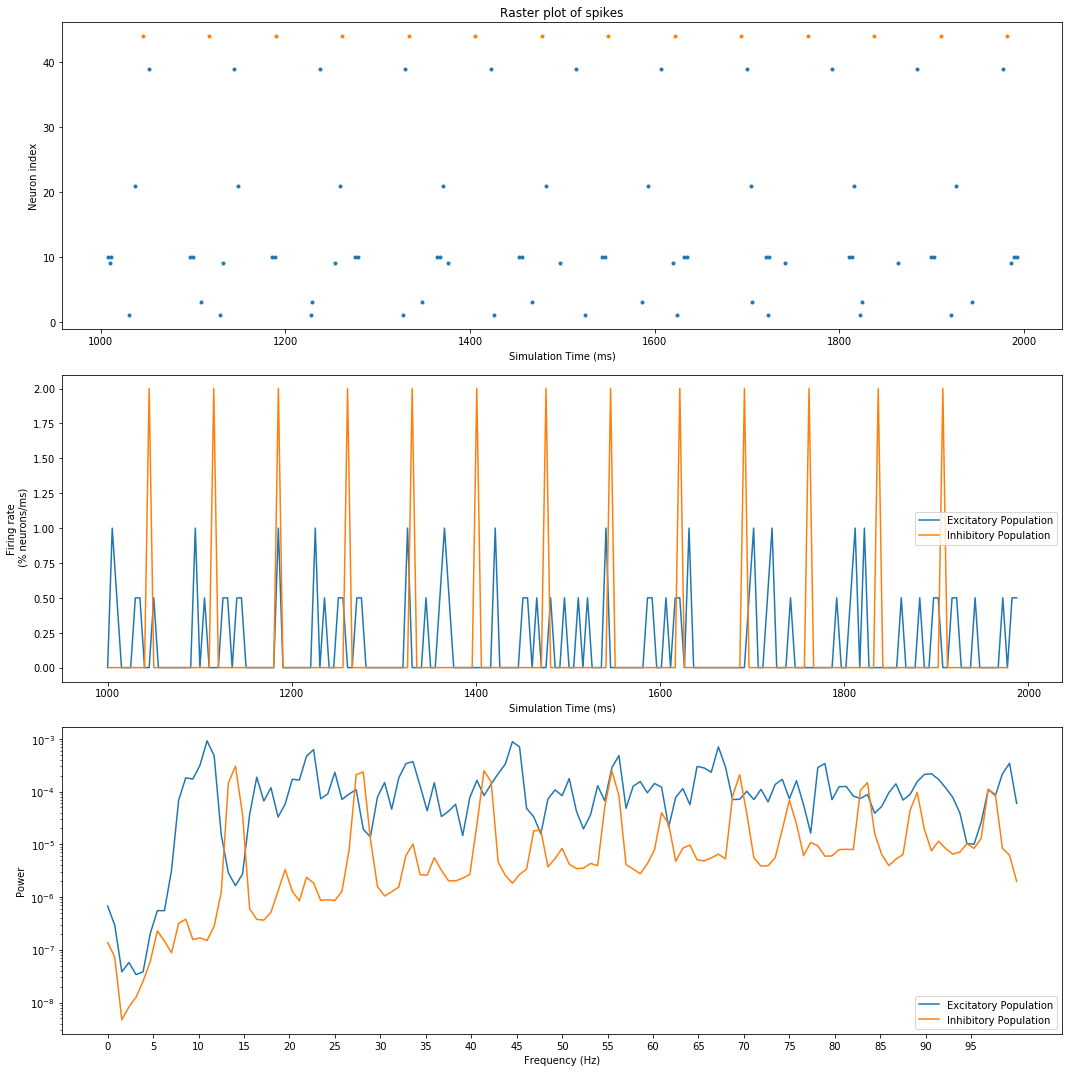

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 5, 5)
378 exc spikes, 78 inh spikes


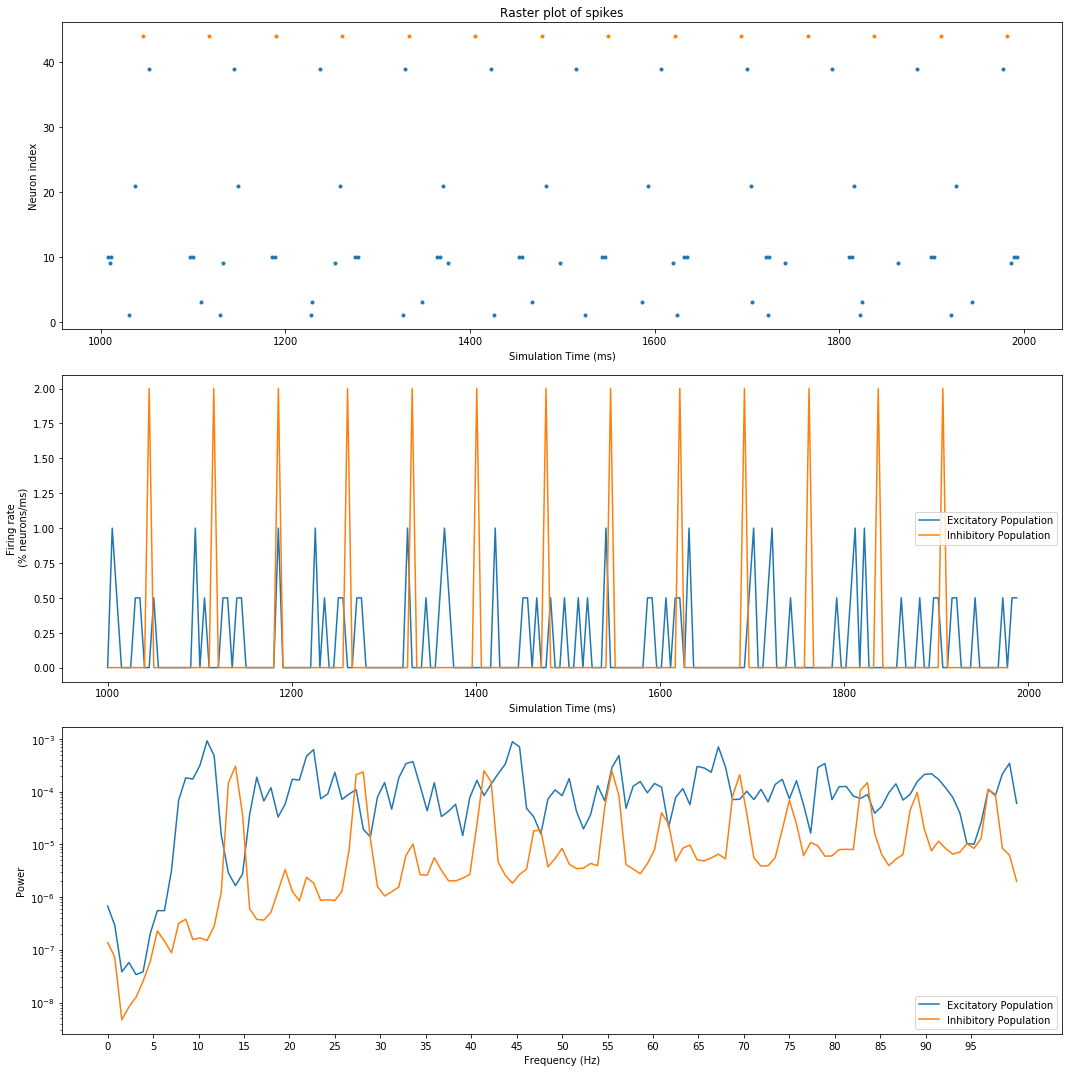

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 5, 10)
378 exc spikes, 78 inh spikes


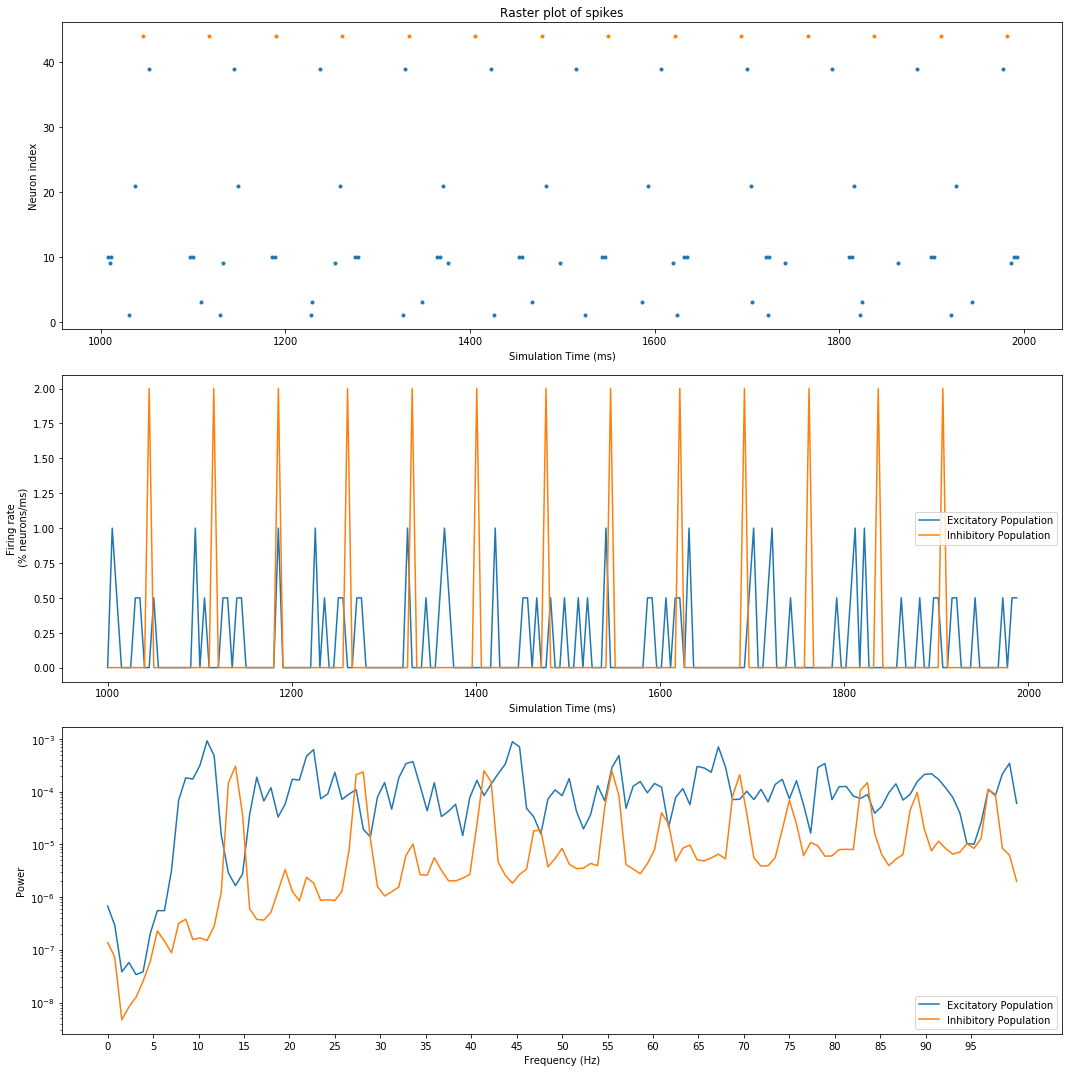

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 10, 1)
378 exc spikes, 78 inh spikes


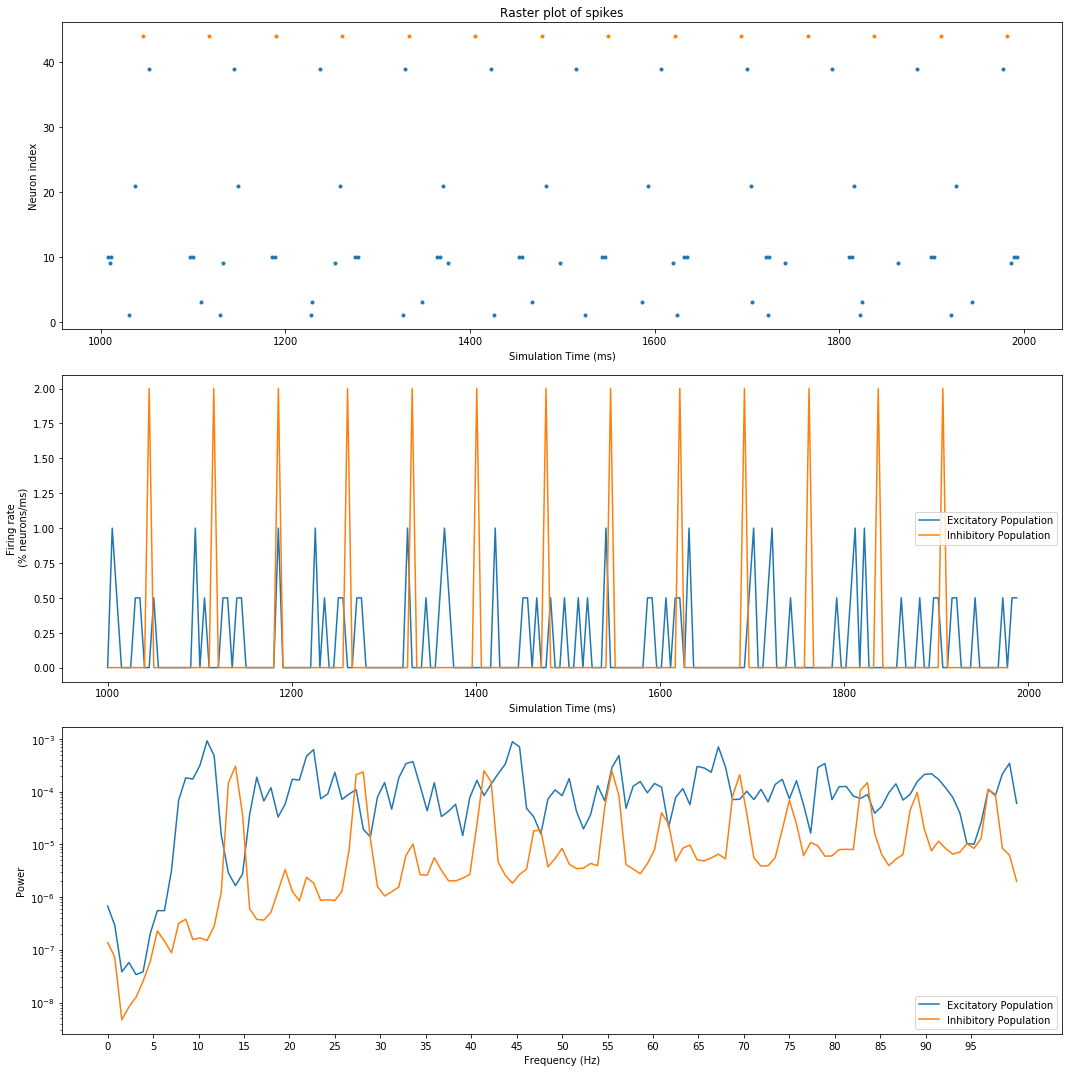

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 10, 5)
378 exc spikes, 78 inh spikes


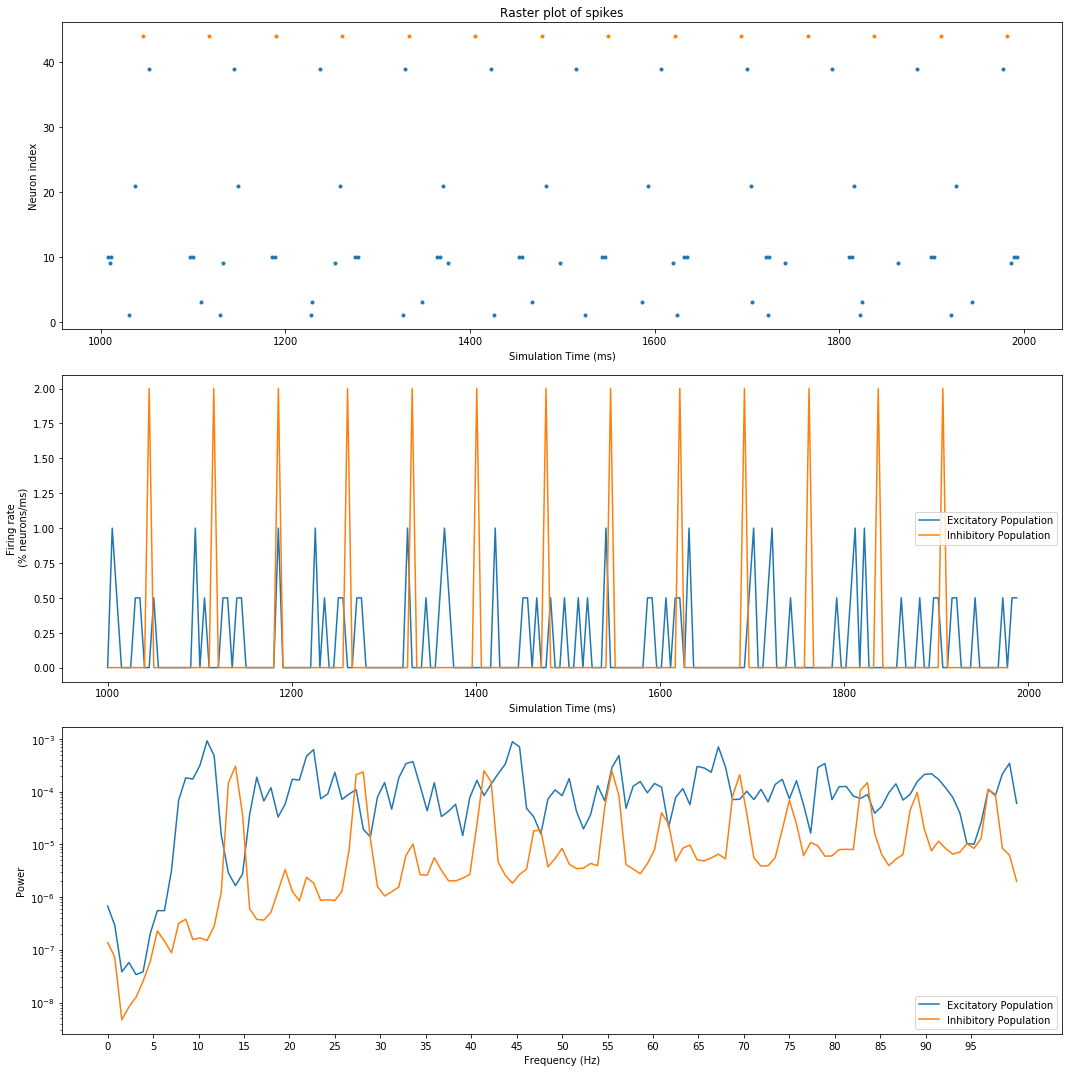

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 10, 10)
378 exc spikes, 78 inh spikes


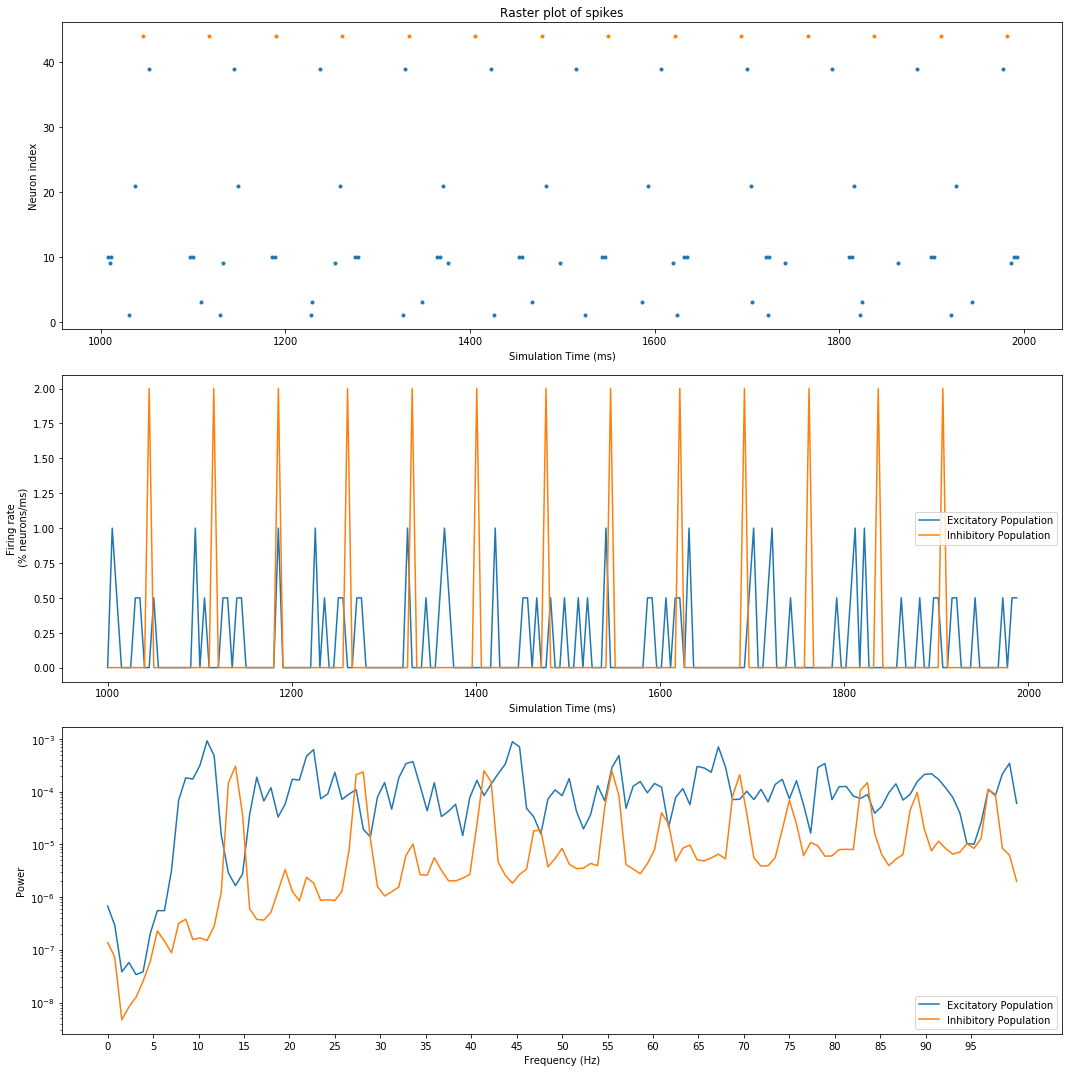

In [17]:

args = itertools.product(a, b, c, d, exconn, inconn, delays, delays, delays)
for arg, data in zip(args, results):
    print(arg)
    plot_stuff(data)

In [179]:
f[pxx.argmax()]

0.78125

In [180]:
len(x)

3795

In [182]:
zip(ma, t)

[(0.80000000000000004, 1000.0),
 (1.22, 1010.0),
 (1.0, 1020.0),
 (0.88, 1030.0),
 (1.02, 1040.0),
 (1.2, 1050.0),
 (0.66000000000000003, 1060.0),
 (0.56000000000000005, 1070.0),
 (0.88, 1080.0),
 (1.0, 1090.0),
 (0.69999999999999996, 1100.0),
 (0.78000000000000003, 1110.0),
 (1.24, 1120.0),
 (1.04, 1130.0),
 (0.78000000000000003, 1140.0),
 (0.95999999999999996, 1150.0),
 (1.1000000000000001, 1160.0),
 (0.57999999999999996, 1170.0),
 (0.56000000000000005, 1180.0),
 (1.1000000000000001, 1190.0),
 (1.26, 1200.0),
 (1.04, 1210.0),
 (1.0600000000000001, 1220.0),
 (1.1200000000000001, 1230.0),
 (0.66000000000000003, 1240.0),
 (0.44, 1250.0),
 (0.81999999999999995, 1260.0),
 (0.97999999999999998, 1270.0),
 (0.83999999999999997, 1280.0),
 (0.81999999999999995, 1290.0),
 (1.1200000000000001, 1300.0),
 (1.3400000000000001, 1310.0),
 (1.1799999999999999, 1320.0),
 (1.2, 1330.0),
 (1.28, 1340.0),
 (1.0600000000000001, 1350.0),
 (0.44, 1360.0),
 (0.52000000000000002, 1370.0),
 (0.66000000000000003

In [195]:
rate = 1.0/(float(shift)/1000)
time_array = np.arange(0, 4, 1/rate)

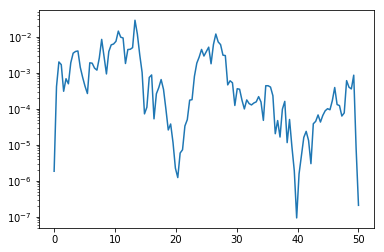

In [166]:
f, pxx = psd.power_spectrum(x, dt, shift, t1, t2)
plt.semilogy(f, pxx)
plt.show()

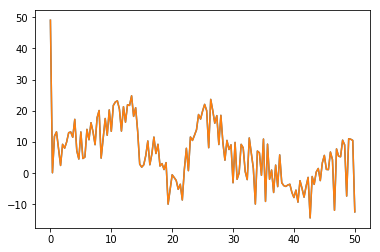

In [199]:
p = 20*np.log10(np.abs(np.fft.rfft(ma)))
f = np.linspace(0, rate/2, len(p))
plt.plot(f, p)
plt.show()